In [448]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [449]:
full = pd.read_csv("SARP WAS 2009-2019.csv", usecols = range(124), nrows = 3136)

In [450]:
def data():
    full = pd.read_csv("SARP WAS 2009-2019.csv", usecols = range(124), nrows = 3136)
    Et = []
    Pe = []
    Bu = []
    Pr = []
    Et = full['EtONO2 (C/D)']/full['Ethane (E)']
    Pe = full['2-PeONO2 (D)']/full['n-Pentane (E)']
    Bu = full['2-BuONO2 (D)']/full['n-Butane (E)']
    Pr = full['i-PrONO2 (D)']/full['Propane (E/B)']
    full['Et ratio'] = Et
    full['Pe ratio'] = Pe
    full['Bu ratio'] = Bu
    full['Pr ratio'] = Pr
    full['Et/Bu ratio'] = Et/Bu
    full['Pr/Bu ratio'] = Pr/Bu
    full['Pe/Bu ratio'] = Pe/Bu
    full = full.replace(np.inf, np.nan)
    return full

In [451]:
for i in full.keys():
    print(i)

Snake#
Can#
Flight
Jday
date
OpenTime
CloseTime
Julian Open Time
Julian Closing Time
Jopen time Progressive
J close time Progressive
Latitude
Longitude
AltP_feet
AltP_meters
Radaralt_ft
Radaralt_m
SARP Year
Weather
Comments
H2 (ppbv)mult by 1.6
CH4 (ppmv)
CO (ppbv)
CO2_ppm
OCS (MS)
DMS (MS)
CFC-12 (C/D)
CFC-11 (C/D)
CFC-113 (D)
CFC-114 (C/MS)
H-1211 (C/D)
H-1301 (C)
H-2402 (D)
HFC-152a (MS)
HFC-134a (MS)
HCFC-22 (MS)
HCFC-142b
HCFC-141b (MS)
HFC-227ea (MS)
HCFC-124 (MS)
HFC-365mfc (MS)
CHCl3 (C/D)
CH3CCl3 (C/MS)
CCl4 (C/MS)
CH2Cl2 (C/D/MS)
C2HCl3 (D/MS)
C2Cl4 (C/MS)
CH3Cl (MS)
CH3Br (C/MS)
CH3I (C/D)
CH2Br2 (D)
CHBrCl2 (D)
CHBr2Cl (D)
CHBr3 (C/MS)
1,2-DCE (MS)
MeONO2 (C/D)
EtONO2 (C/D)
i-PrONO2 (D)
n-PrONO2 (C)
2-BuONO2 (D)
3-PeONO2 (D)
2-PeONO2 (D)
3-Methyl-2-BuONO2 (D)
Ethane (E)
Ethene (E)
Ethyne (E)
Propane (E/B)
Propene (E)
i-Butane (E)
n-Butane (E)
i-Butene (E)
1-Butene (E)
trans-2-Butene (MS)
cis-2-Butene (MS)
i-Pentane (E)
n-Pentane (E)
1-Pentene
Isoprene (E/B)
1,3-Butadiene (B

In [452]:
import scipy.optimize as optimization
from scipy.stats import pearsonr 

In [453]:
def slopefunc(x, s1):
    return s1*x

In [454]:
#define function used to fit line to data
def slopeintfunc(x,s1,incpt):
    return s1*x+incpt

In [455]:
def scatter1(x, y, s='', c='', bestfit = "no", year = 0, flight = '0'):
    '''
    This function will create a scatterplot of two variables, x and y. 
    To make a colormap of another variable, set c = columnname.
    To make point size correspond to another variable, set s = columnname. 
    To add a line of best fit for the xaxis and yaxis variables, set bestfit = "yes".
    '''
    if year > 0:
        df = full['SARP Year'].astype(int) == year
        data = full[df]
        years = " in the year "+ str(year)
    else:
        data = full
        years = ""
    if flight != '0':
        df1 = full['Flight'].astype(str) == flight
        data = data[df1]
        flights = " flight "+ str(flight)
    else:
        data = data
        flights = ""
    xaxis = data[x]
    yaxis = data[y]
    if c != '':
        coloraxis = data[c]
    else:
        coloraxis = None
    if s != '':
        sizeaxis = (data[s]/(data[s].max()))*400
    else:
        sizeaxis = None
    
    plt.scatter(xaxis, yaxis, s = sizeaxis, c = coloraxis, cmap = 'plasma')
    #plt.scatter(xaxis, yaxis, s = 120, c = coloraxis, cmap = 'plasma')     #for colormap
    if c != '':
        plt.colorbar(orientation="vertical" , label = str(c))
        #plt.colorbar(orientation="vertical" , label = str(c), shrink=0.5)#     for colormap
    plt.title(str(y)+" vs "+str(x)+" with color representing "+str(c)+ " and size representing "+str(s)+years)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    
    if bestfit == "yes":
        cleany = yaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        cleanx = xaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        best = optimization.curve_fit(slopeintfunc, cleanx, cleany)
        #best = optimization.curve_fit(slopefunc, cleanx, cleany)
        print("slope, int =",best[0])
        print("(R (correleation coefficient), p-value) =",pearsonr(cleanx, cleany))
        if c == '':
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "salmon")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "salmon")
        else:
            plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "cornflowerblue")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "cornflowerblue")

In [456]:
#Modified for subplots

def scatter3(ax1, x, y, s='', c='', bestfit = "no", year = 0, flight = '0'):
    '''
    This function will create a scatterplot of two variables, x and y. 
    To make a colormap of another variable, set c = columnname.
    To make point size correspond to another variable, set s = columnname. 
    To add a line of best fit for the xaxis and yaxis variables, set bestfit = "yes".
    '''
    if year > 0:
        df = full['SARP Year'].astype(int) == year
        data = full[df]
        years = " in the year "+ str(year)
    else:
        data = full
        years = ""
    if flight != '0':
        df1 = full['Flight'].astype(str) == flight
        data = data[df1]
        flights = " flight "+ str(flight)
    else:
        data = data
        flights = ""
    xaxis = data[x]
    yaxis = data[y]
    if c != '':
        coloraxis = data[c]
    else:
        coloraxis = None
    if s != '':
        sizeaxis = (data[s]/(data[s].max()))*400
    else:
        sizeaxis = None
    
    ax1.scatter(xaxis, yaxis, s = sizeaxis, c = coloraxis, cmap = 'plasma')
    #plt.scatter(xaxis, yaxis, s = 120, c = coloraxis, cmap = 'plasma')     #for colormap
    if c != '':
        ax1.colorbar(orientation="vertical" , label = str(c))
        #plt.colorbar(orientation="vertical" , label = str(c), shrink=0.5)#     for colormap
    #ax1.title(str(y)+" vs "+str(x)+" with color representing "+str(c)+ " and size representing "+str(s)+years)
    #ax1.xlabel(str(x))
    #ax1.ylabel(str(y))
    
    if bestfit == "yes":
        cleany = yaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        cleanx = xaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        best = optimization.curve_fit(slopeintfunc, cleanx, cleany)
        #best = optimization.curve_fit(slopefunc, cleanx, cleany)
        print("slope, int =",best[0])
        print("(R (correleation coefficient), p-value) =",pearsonr(cleanx, cleany))
        if c == '':
            ax1.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "salmon")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "salmon")
        else:
            ax1.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "cornflowerblue")
            #plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "cornflowerblue")

In [457]:
def scatter2(x, y, s='', c='', bestfit = "no", year = 0, flight = '0'):
    '''
    This function will create a scatterplot of two variables, x and y. 
    To make a colormap of another variable, set c = columnname.
    To make point size correspond to another variable, set s = columnname. 
    To add a line of best fit for the xaxis and yaxis variables, set bestfit = "yes".
    '''
    if year > 0:
        df = full['SARP Year'].astype(int) == year
        data = full[df]
        years = " in the year "+ str(year)
    else:
        data = full
        years = ""
    if flight != '0':
        df1 = full['Flight'].astype(str) == flight
        data = data[df1]
        flights = " flight "+ str(flight)
    else:
        data = data
        flights = ""    
    xaxis = data[x]
    yaxis = data[y]
    if c != '':
        coloraxis = data[c]
    else:
        coloraxis = None
    if s != '':
        sizeaxis = (data[s]/(data[s].max()))*400
    else:
        sizeaxis = None
    
    #plt.scatter(xaxis, yaxis, s = sizeaxis, c = coloraxis, cmap = 'plasma')
    plt.scatter(xaxis, yaxis, s = 120, c = coloraxis, cmap = 'plasma')     #for colormap
    if c != '':
        #plt.colorbar(orientation="vertical" , label = str(c))
        plt.colorbar(orientation="vertical" , label = str(c), shrink=0.5)#     for colormap
    plt.title(str(y)+" vs "+str(x)+" with color representing "+str(c)+ " and size representing "+str(s)+years)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    
    if bestfit == "yes":
        cleany = yaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        cleanx = xaxis[(np.isnan(data[y])==False) & (np.isnan(data[x])==False)]
        best = optimization.curve_fit(slopeintfunc, cleanx, cleany)
        #best = optimization.curve_fit(slopefunc, cleanx, cleany)
        print("slope, int =",best[0])
        print("(R (correleation coefficient), p-value) =",pearsonr(cleanx, cleany))
        if c == '':
            #plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "salmon")
            plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "salmon")
        else:
            #plt.plot(cleanx, slopeintfunc(cleanx, best[0][0], best[0][1]), color = "cornflowerblue")
            plt.plot(cleanx, slopefunc(cleanx, best[0]), color = "cornflowerblue")

In [458]:
def by_year(dataframe, year):
    df = dataframe['SARP Year'].astype(int) == year
    data = dataframe[df]
    return data

In [459]:
def by_alt(dataframe, min_alt, max_alt = 50000):
    altRange = dataframe[(dataframe['AltP_feet'] > min_alt) & (dataframe['AltP_feet'] < max_alt)]
    return altRange

In [460]:
def by_latlong(dataframe, minlat, maxlat, minlong, maxlong):
    data = dataframe[(dataframe['Latitude'] > minlat) & (dataframe['Latitude'] < maxlat) & (dataframe['Longitude'] > minlong) & (dataframe['Longitude'] < maxlong)]
    return data

In [461]:
def by_flight(dataframe, number):
    df = dataframe['Flight'].astype(str) == number
    data = dataframe[df]
    return data

In [462]:
def by_compound(dataframe, compound, minval, maxval):
    data = dataframe[(dataframe[compound] > minval) & (dataframe[compound] < maxval)]
    return data

Use scatter1 to create some pretty scatterplots. Inputs are the column name, copy and paste from the above keys output box. 
Optional parameter s = 'columnname' ---> variable corresponds to size of point
Optional parameter c = 'columnname' ---> variable corresponds to color of point
Optional parameter bestfit = "yes" ---> bestfit line for x and y variables
Optional parameter year = ___ ---> if you want to constrain the data to a single year

Example below with all inputs / dimensions used:

slope, int = [-2.33623207e-02  2.10038351e+02]
(R (correleation coefficient), p-value) = (-0.39689405573687175, 8.481002606348579e-13)


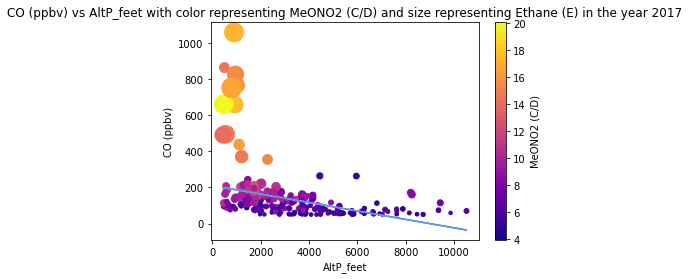

In [463]:
scatter1('AltP_feet', 'CO (ppbv)', s='Ethane (E)', c='MeONO2 (C/D)', year = 2017, bestfit='yes')

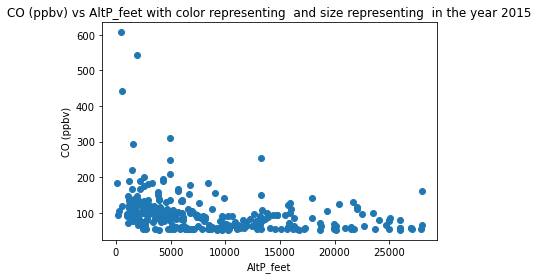

In [16]:
scatter1('AltP_feet', 'CO (ppbv)', year = 2015)

## Beginning exploration of Toluene at 13000 ft

> 2015

Text(0.5, 1.0, 'Toluene (ppt) vs Altitude in 2015')

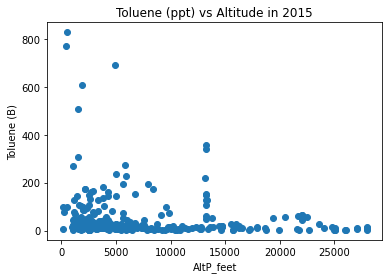

In [17]:
scatter1('AltP_feet', 'Toluene (B)', year = 2015)#, c='CH4 (ppmv)')
plt.title("Toluene (ppt) vs Altitude in 2015")
#7

> 2011

Text(0.5, 1.0, 'Toluene (ppt) vs Altitude in 2011')

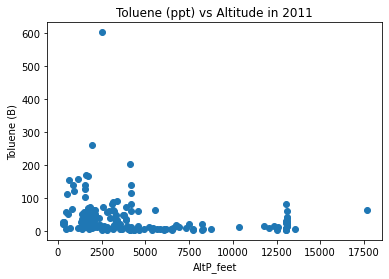

In [18]:
scatter1('AltP_feet', 'Toluene (B)', year = 2011)# c='CH4 (ppmv)')
plt.title("Toluene (ppt) vs Altitude in 2011")

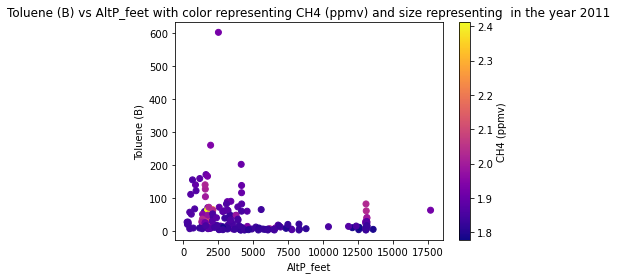

In [19]:
scatter1('AltP_feet', 'Toluene (B)', c = 'CH4 (ppmv)', year = 2011)# c='CH4 (ppmv)')

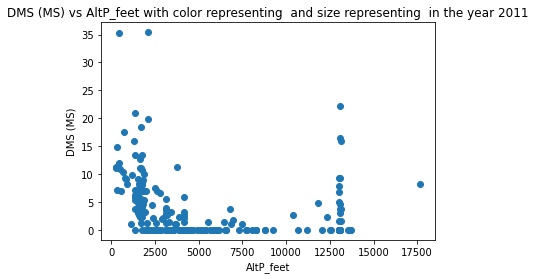

In [20]:
scatter1('AltP_feet', 'DMS (MS)', year = 2011)# c='CH4 (ppmv)')

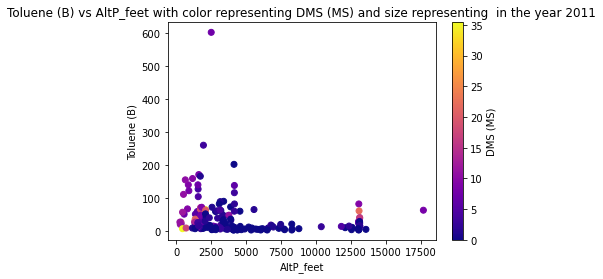

In [21]:
scatter1('AltP_feet', 'Toluene (B)', c='DMS (MS)', year = 2011)# c='CH4 (ppmv)')

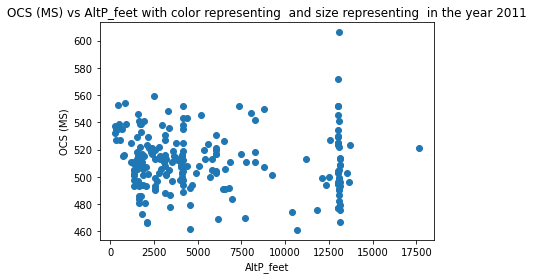

In [22]:
scatter1('AltP_feet', 'OCS (MS)', year = 2011)# c='CH4 (ppmv)')

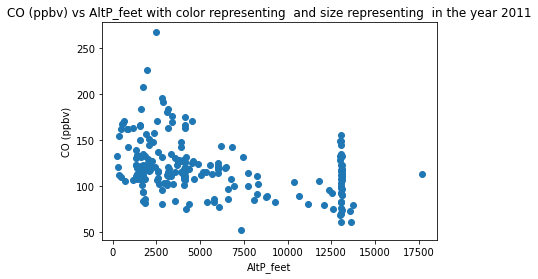

In [23]:
scatter1('AltP_feet', 'CO (ppbv)', year = 2011)# c='CH4 (ppmv)')

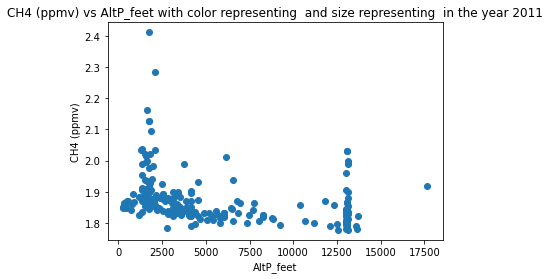

In [24]:
scatter1('AltP_feet', 'CH4 (ppmv)', year = 2011)# c='CH4 (ppmv)')

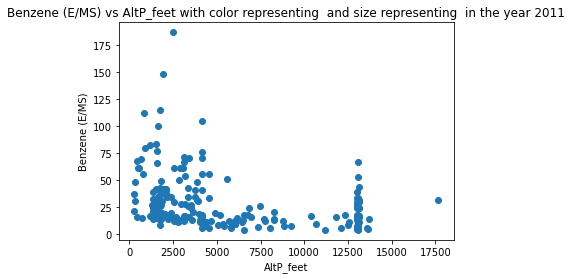

In [25]:
scatter1('AltP_feet', 'Benzene (E/MS)', year = 2011)# c='CH4 (ppmv)')

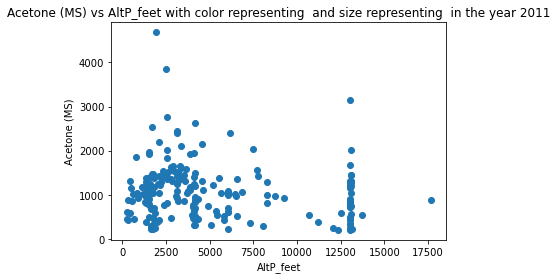

In [26]:
scatter1('AltP_feet', 'Acetone (MS)', year = 2011)# c='CH4 (ppmv)')

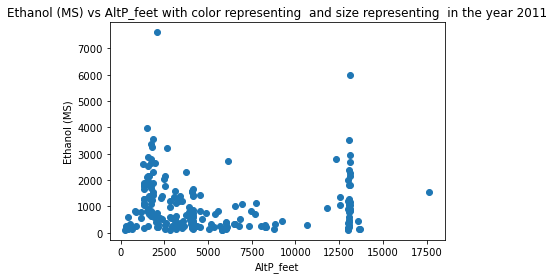

In [27]:
scatter1('AltP_feet', 'Ethanol (MS)', year = 2011)# c='CH4 (ppmv)')

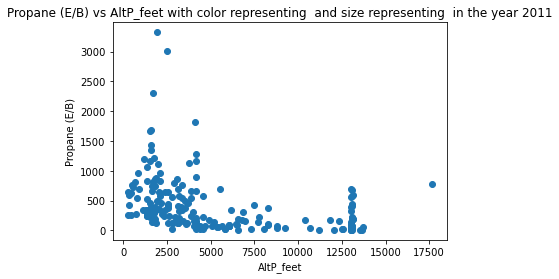

In [28]:
scatter1('AltP_feet', 'Propane (E/B)', year = 2011)# c='CH4 (ppmv)')

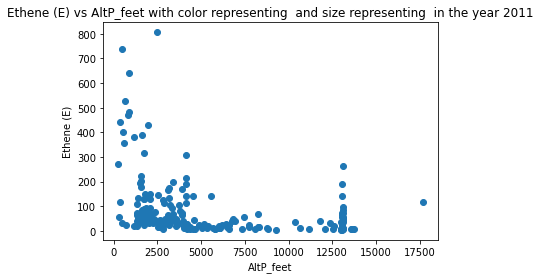

In [29]:
scatter1('AltP_feet', 'Ethene (E)', year = 2011)# c='CH4 (ppmv)')

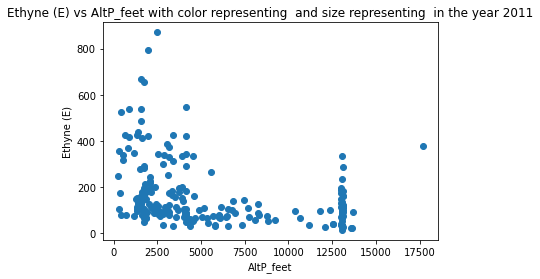

In [30]:
scatter1('AltP_feet', 'Ethyne (E)', year = 2011)# c='CH4 (ppmv)')

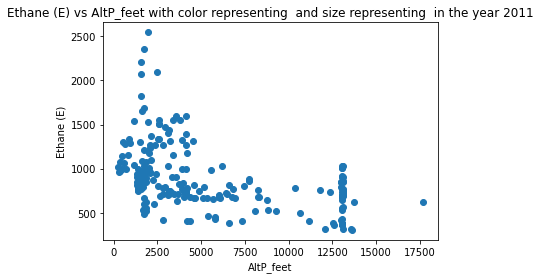

In [31]:
scatter1('AltP_feet', 'Ethane (E)', year = 2011)# c='CH4 (ppmv)')

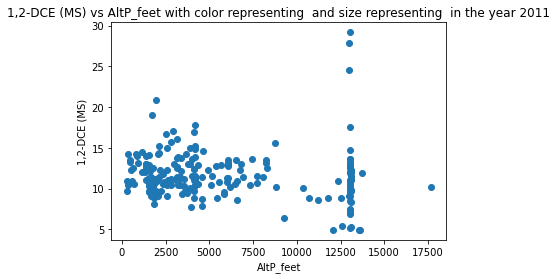

In [32]:
scatter1('AltP_feet', '1,2-DCE (MS)',year = 2011)# c='CH4 (ppmv)')

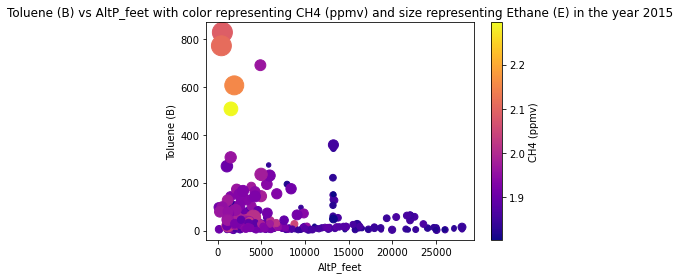

In [33]:
scatter1('AltP_feet', 'Toluene (B)', s ='Ethane (E)', c='CH4 (ppmv)', year = 2015)
#7

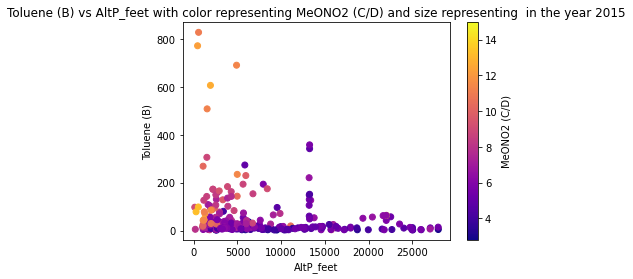

In [34]:
scatter1('AltP_feet', 'Toluene (B)',c='MeONO2 (C/D)', year=2015)

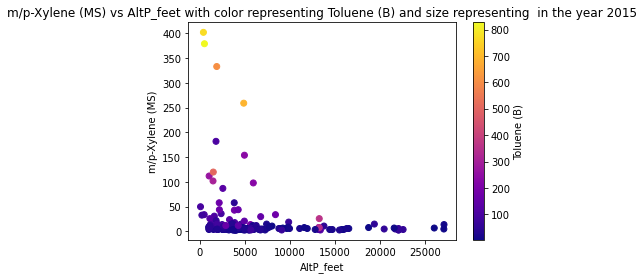

In [35]:
scatter1('AltP_feet', 'm/p-Xylene (MS)',c='Toluene (B)', year=2015)

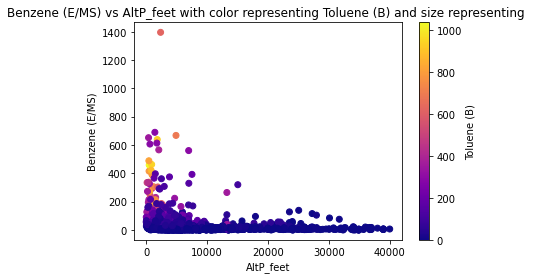

In [36]:
scatter1('AltP_feet', 'Benzene (E/MS)',c='Toluene (B)')#, year=2015)

## Is this peak consistent through the years?   $ NO $

#### Or at least a mini peak by the Salton Sea?

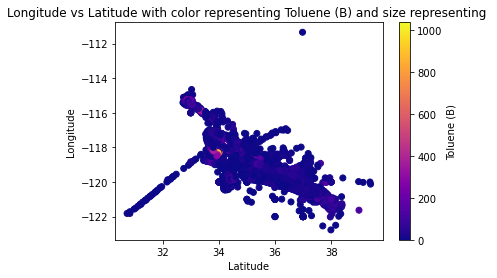

In [37]:
scatter1('Latitude', 'Longitude', c = 'Toluene (B)')

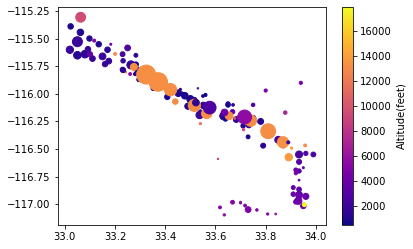

In [38]:
## Create new population the has latitude-longitude range of the Salton Sea

saltonSeaCoord = full[(full['Latitude'] > 33) & (full['Latitude'] < 34) & (full['Longitude'] > -117.1) & (full['Longitude'] < -115.25)]
#plt.scatter(saltonSeaCoord['Latitude'], saltonSeaCoord['Longitude'], c = saltonSeaCoord['Toluene (B)'], cmap = 'plasma')

plt.scatter(saltonSeaCoord['Latitude'], saltonSeaCoord['Longitude'], s = saltonSeaCoord['Toluene (B)'],c=saltonSeaCoord['AltP_feet'], cmap = 'plasma')

plt.colorbar(label = 'Altitude(feet)')
# Usually points are taken way below 13000 feet, and when they are taken at that height they are
# only high in Toluene in 2015 --> truly an outlier plume

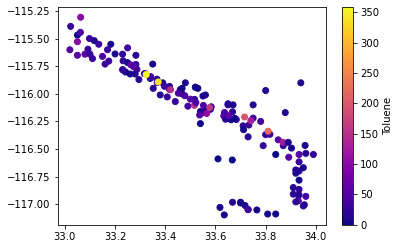

In [39]:
plt.scatter(saltonSeaCoord['Latitude'], saltonSeaCoord['Longitude'], c = saltonSeaCoord['Toluene (B)'], cmap = 'plasma')
plt.colorbar(label = 'Toluene')


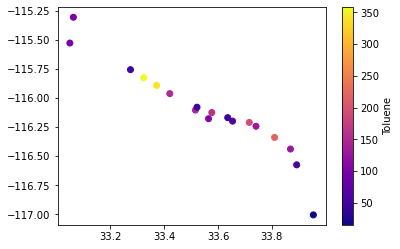

In [40]:
saltonSeaCoord2015 = saltonSeaCoord[saltonSeaCoord['SARP Year'].astype(int) == 2015]
plt.scatter(saltonSeaCoord2015['Latitude'], saltonSeaCoord2015['Longitude'], c = saltonSeaCoord2015['Toluene (B)'], cmap = 'plasma')
plt.colorbar(label = 'Toluene')
##2015 contains all of the high points --> isolated trend over the Salton Sea in 2015

In [41]:
##One can is a crazy spike in Toluene and a ton of other compounds. Snake #4013 AND Can #9374. 6/23/15 
##Open time 1:40
##Other compounds: Ethane, Ethene, Ethyne,...,Propane, Propene, ...
## SUPER WEIRD PLUME -- REALLY INTERESTING 

In [42]:
tol = pd.read_csv("TolueneData.csv", usecols = range(124), nrows = 15)

In [43]:
tol

Snake#  Can#  Flight   Jday      date OpenTime CloseTime  \
0     4109  9415       1   174.0  6/23/15  1:26:00   1:26:25   
1     4124  9352       1   174.0  6/23/15  1:27:00   1:27:25   
2     4001  9362       1   174.0  6/23/15  1:30:02   1:30:31   
3     4016  9364       1   174.0  6/23/15  1:31:04   1:31:32   
4     4017  9360       1   174.0  6/23/15  1:32:00   1:32:32   
5     4002  9378       1   174.0  6/23/15  1:33:01   1:33:34   
6     4015  9382       1   174.0  6/23/15  1:34:01   1:34:30   
7     4018  9369       1   174.0  6/23/15  1:35:00   1:35:32   
8     4003  9368       1   174.0  6/23/15  1:36:00   1:36:34   
9     4019  9375       1   174.0  6/23/15  1:38:00   1:38:36   
10    4004  9380       1   174.0  6/23/15  1:39:03   1:39:36   
11    4013  9374       1   174.0  6/23/15  1:40:00   1:40:37   
12    4020  9383       1   174.0  6/23/15  1:41:00   1:41:38   
13    4005  9366       1   174.0  6/23/15  1:47:01   1:47:37   
14    4012  9370       1   174.0  6/23/15  1:48:12   1:48:45   

    Julian Open Time  Julian Closing Time  Jopen time Progressive  \
0            174.060              174.060              42178.0597   
1            174.060              174.061              42178.0604   
2            174.063              174.063              42178.0625   
3            174.063              174.064              42178.0632   
4            174.064              174.064              42178.0639   
5            174.065              174.065              42178.0646   
6            174.065              174.066              42178.0653   
7            174.066              174.066              42178.0660   
8            174.067              174.067              42178.0667   
9            174.068              174.068              42178.0681   
10           174.069              174.069              42178.0688   
11           174.069              174.070              42178.0694   
12           174.070              174.071              42178.0701   
13           174.074              174.075              42178.0743   
14           174.075              174.076              42178.0751   

    J close time Progressive  Latitude  Longitude  AltP_feet  AltP_meters  \
0                 42178.0600    33.975   -117.151      19352         5900   
1                 42178.0607    33.954   -117.006      17933         5467   
2                 42178.0629    33.892   -116.575      13774         4200   
3                 42178.0636    33.869   -116.439      13377         4078   
4                 42178.0643    33.810   -116.339      13196         4023   
5                 42178.0650    33.741   -116.243      13215         4029   
6                 42178.0656    33.654   -116.199      13211         4028   
7                 42178.0663    33.565   -116.178      13202         4025   
8                 42178.0671    33.516   -116.104      13211         4028   
9                 42178.0685    33.421   -115.962      13251         4040   
10                42178.0692    33.372   -115.892      13252         4040   
11                42178.0699    33.324   -115.825      13252         4040   
12                42178.0706    33.275   -115.756      13252         4040   
13                42178.0747    33.063   -115.305       9538         2908   
14                42178.0755    32.990   -115.243       7948         2423   

    Radaralt_ft  Radaralt_m  SARP Year  Weather  Comments  \
0         19352        5900       2015      NaN       NaN   
1         17933        5467       2015      NaN       NaN   
2         13774        4200       2015      NaN       NaN   
3         13377        4078       2015      NaN       NaN   
4         13196        4023       2015      NaN       NaN   
5         13215        4029       2015      NaN       NaN   
6         13211        4028       2015      NaN       NaN   
7         13202        4025       2015      NaN       NaN   
8         13211        4028       2015      NaN       NaN   
9         13251        4040    

In [44]:
full = tol

In [45]:
for i in full.keys():
    print(i)

Snake#
Can#
Flight
 Jday 
date
OpenTime
CloseTime
Julian Open Time
Julian Closing Time
Jopen time Progressive
J close time Progressive
Latitude
Longitude
AltP_feet
AltP_meters
Radaralt_ft
Radaralt_m
SARP Year
Weather
Comments
H2 (ppbv)mult by 1.6
CH4 (ppmv)
CO (ppbv)
CO2_ppm
OCS (MS)
DMS (MS)
CFC-12 (C/D)
CFC-11 (C/D)
CFC-113 (D)
CFC-114 (C/MS)
H-1211 (C/D)
H-1301 (C)
H-2402 (D)
HFC-152a (MS)
HFC-134a (MS)
HCFC-22 (MS)
HCFC-142b
HCFC-141b (MS)
HFC-227ea (MS)
HCFC-124 (MS)
HFC-365mfc (MS)
CHCl3 (C/D)
CH3CCl3 (C/MS)
CCl4 (C/MS)
CH2Cl2 (C/D/MS)
C2HCl3 (D/MS)
C2Cl4 (C/MS)
CH3Cl (MS)
CH3Br (C/MS)
CH3I (C/D)
CH2Br2 (D)
CHBrCl2 (D)
CHBr2Cl (D)
CHBr3 (C/MS)
1,2-DCE (MS)
MeONO2 (C/D)
EtONO2 (C/D)
i-PrONO2 (D)
n-PrONO2 (C)
2-BuONO2 (D)
3-PeONO2 (D)
2-PeONO2 (D)
3-Methyl-2-BuONO2 (D)
Ethane (E)
Ethene (E)
Ethyne (E)
Propane (E/B)
Propene (E)
i-Butane (E)
n-Butane (E)
i-Butene (E)
1-Butene (E)
trans-2-Butene (MS)
cis-2-Butene (MS)
i-Pentane (E)
n-Pentane (E)
1-Pentene
Isoprene (E/B)
1,3-Butadiene 

# Toluene spike at ~13000 feet
### Around and above the Salton Sea

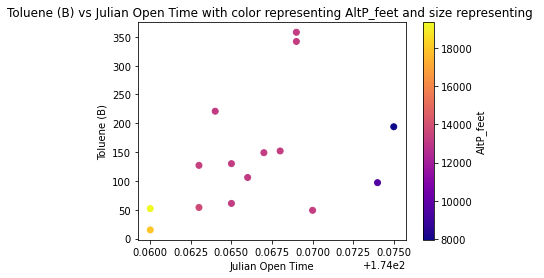

In [46]:
scatter1('Julian Open Time', 'Toluene (B)', c='AltP_feet')
#left points ~ 20000 ft
#middle points ~ 13000 ft ---> this is where toluene trend is observed
#right points ~ 9000-10000 ft

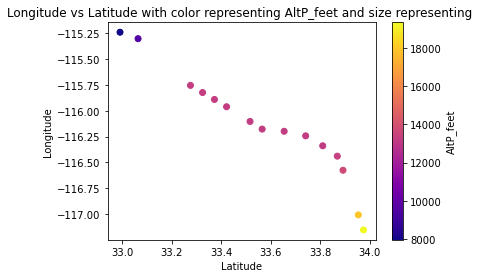

In [47]:
scatter1('Latitude', 'Longitude', c='AltP_feet')
#Flight went from NW to SE across Palm Springs, Rancho Mirage, then Salton Sea

In [48]:
'''
img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2'Longitude','Latitude', c='Toluene (B)')
plt.title('Latitude vs Longitude with color representing Toluene')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
plt.savefig("ColorMap")
'''

'\nimg = plt.imread("pltbckgnd.jpg")\nfig, ax = plt.subplots(figsize=(15,15))\nax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])\nplt.xlim(-118, -115)\nplt.ylim(32.5, 34.25)\nscatter2\'Longitude\',\'Latitude\', c=\'Toluene (B)\')\nplt.title(\'Latitude vs Longitude with color representing Toluene\')\n#plt.colorbar(ax=ax)#, label = \'Toluene (ppt)\')\nplt.savefig("ColorMap")\n'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


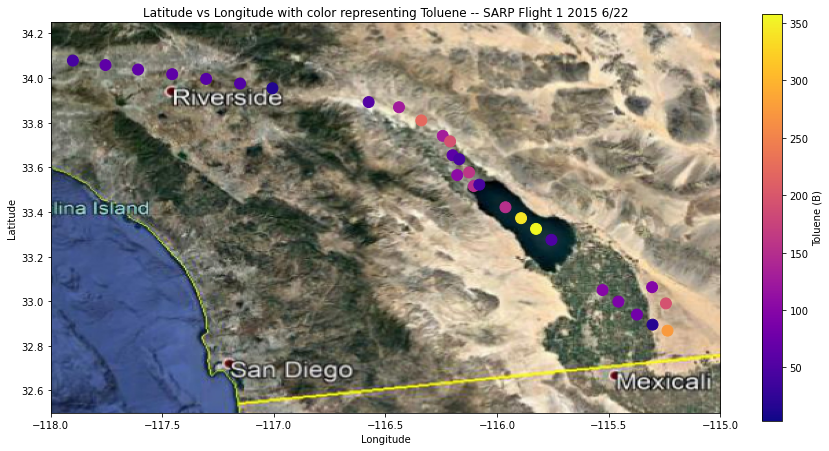

In [476]:
img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', c='Toluene (B)', year=2015, flight = '1')
plt.title('Latitude vs Longitude with color representing Toluene -- SARP Flight 1 2015 6/22')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
plt.savefig("ColorMapFlight1")

Text(0.5, 1.0, 'Latitude vs Longitude with color representing CO')

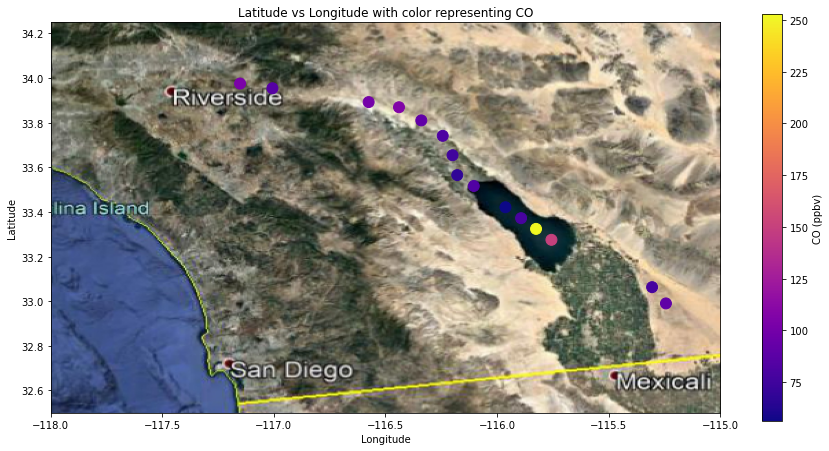

In [50]:

img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='CO (ppbv)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing CO')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Text(0.5, 1.0, 'Latitude vs Longitude with color representing DMS')

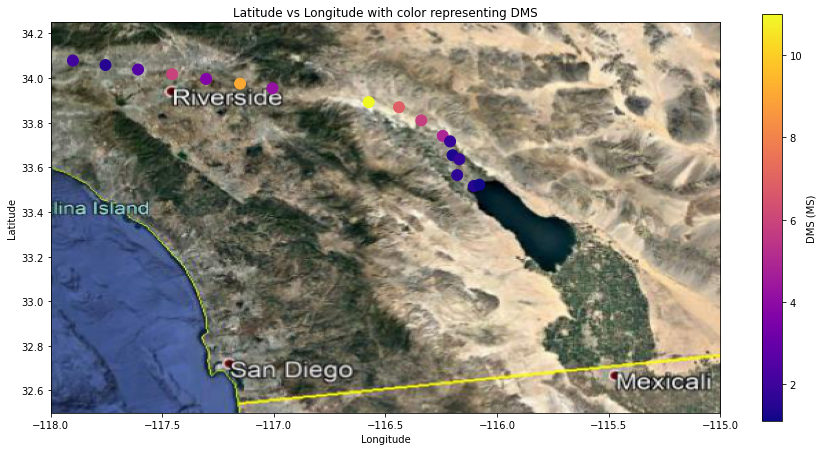

In [475]:

img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='DMS (MS)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing DMS')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")


Text(0.5, 1.0, 'Latitude vs Longitude with color representing Xylene')

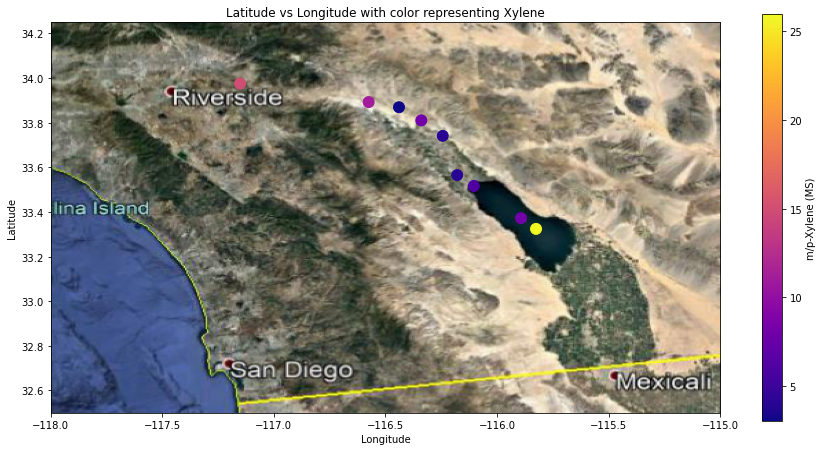

In [52]:
img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='m/p-Xylene (MS)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing Xylene')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")


Text(0.5, 1.0, 'Latitude vs Longitude with color representing Benzene')

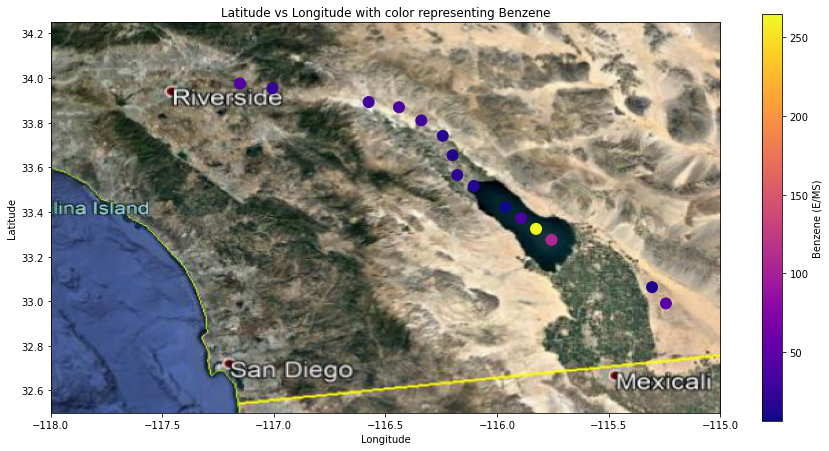

In [53]:

img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='Benzene (E/MS)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing Benzene')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")


Text(0.5, 1.0, 'Latitude vs Longitude with color representing Ethylbenzene')

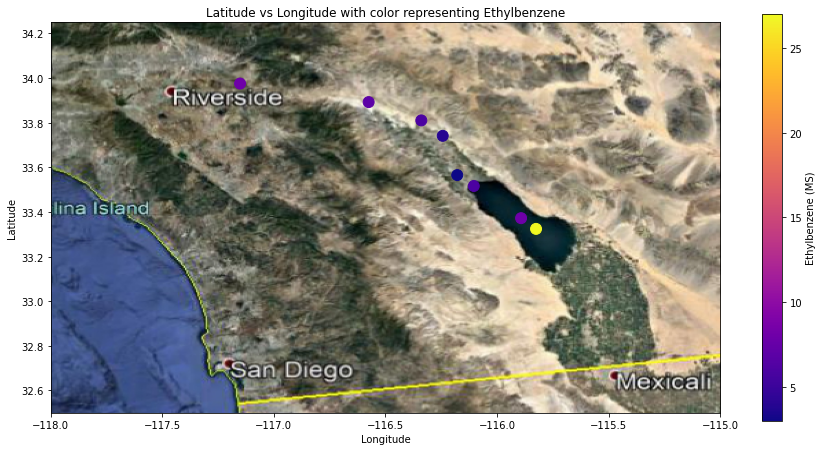

In [54]:
img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='Ethylbenzene (MS)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing Ethylbenzene')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")


Text(0.5, 1.0, 'Latitude vs Longitude with color representing i-Pentane')

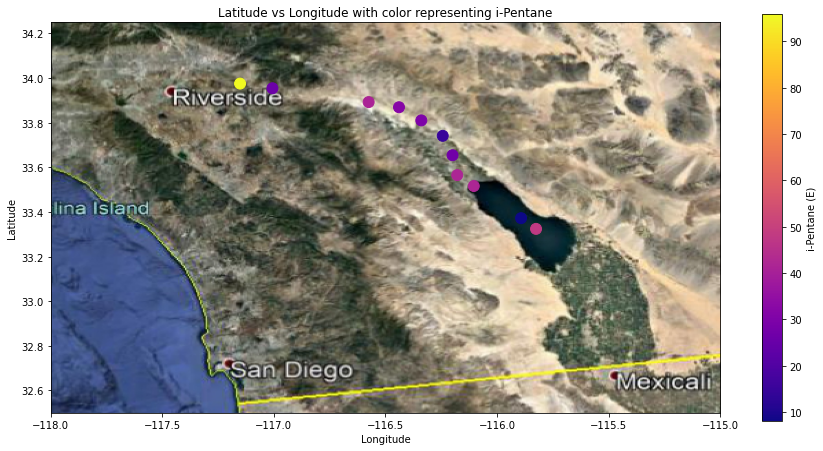

In [55]:
img = plt.imread("pltbckgnd.jpg")
fig, ax = plt.subplots(figsize=(15,15))
ax.imshow(img, extent=[-119.5, -113.2, 31.75, 34.75])
plt.xlim(-118, -115)
plt.ylim(32.5, 34.25)
scatter2('Longitude','Latitude', s='AltP_feet',c='i-Pentane (E)', year = 2015, flight = '1')
plt.title('Latitude vs Longitude with color representing i-Pentane')
#plt.colorbar(ax=ax)#, label = 'Toluene (ppt)')
#plt.savefig("ColorMap")

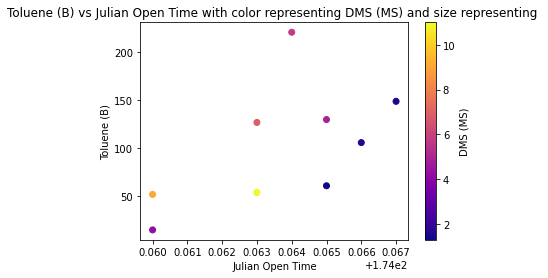

In [56]:
scatter1('Julian Open Time', 'Toluene (B)', c='DMS (MS)')
#DMS decreases on the descent into plume?, but also no points over the Salton Sea?
#See propane and CHBr3

## Peaks above Salton Sea

### Below are some of the weird peaks associated with the one point directly above the Salton Sea

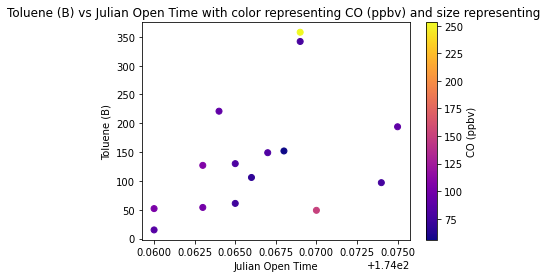

In [57]:
scatter1('Julian Open Time', 'Toluene (B)', c='CO (ppbv)')

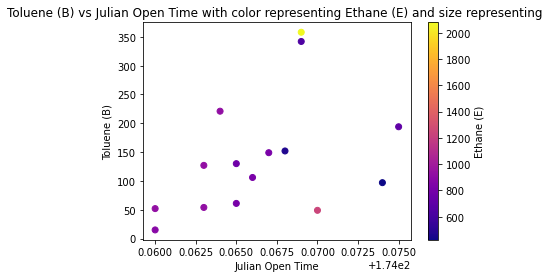

In [58]:
scatter1('Julian Open Time', 'Toluene (B)', c='Ethane (E)')

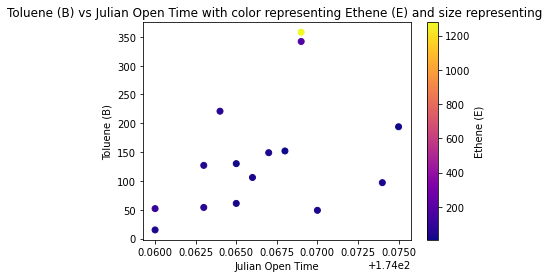

In [59]:
scatter1('Julian Open Time', 'Toluene (B)', c='Ethene (E)')

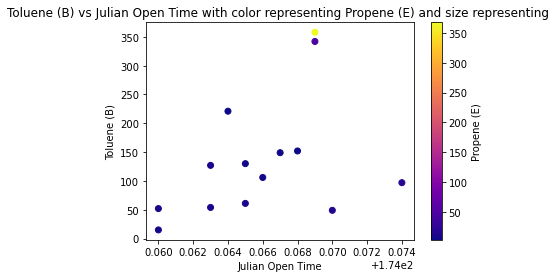

In [60]:
scatter1('Julian Open Time', 'Toluene (B)', c='Propene (E)')
# no gradient, huge peak

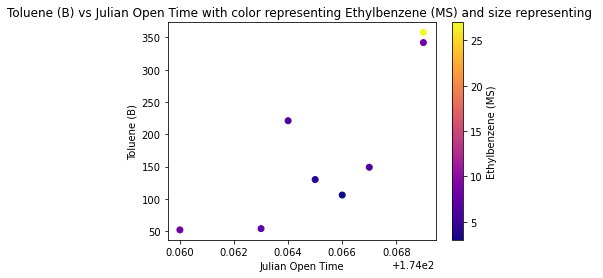

In [61]:
scatter1('Julian Open Time', 'Toluene (B)', c='Ethylbenzene (MS)')

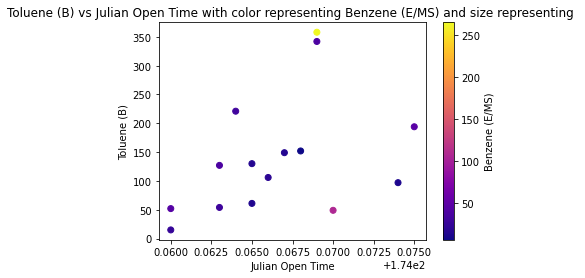

In [62]:
scatter1('Julian Open Time', 'Toluene (B)', c='Benzene (E/MS)')

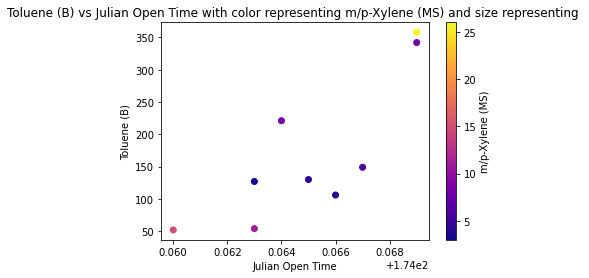

In [63]:
scatter1('Julian Open Time', 'Toluene (B)', c='m/p-Xylene (MS)')

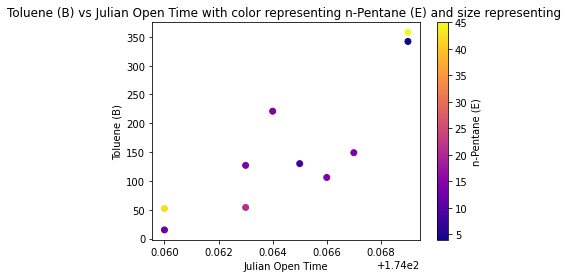

In [64]:
scatter1('Julian Open Time', 'Toluene (B)', c='n-Pentane (E)')
#sort of peak

## Fire Exploration
### i-pentane vs n-pentane
### i-butane vs n-butane

In [65]:
#plume = pd.read_csv("PlumeOnly.csv", usecols = range(124), nrows = 13)

In [66]:
#plume

In [67]:
#full = plume

In [68]:
### WITH INTERCEPT

slope, int = [ 1.41876027 11.32730688]
(R (correleation coefficient), p-value) = (0.8137889933787816, 0.0041735359560759085)


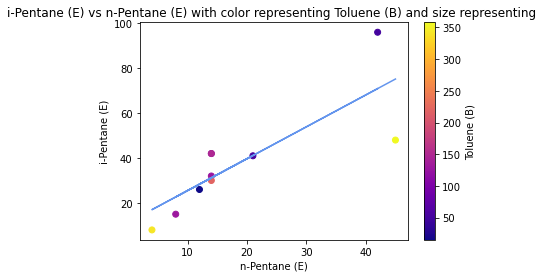

In [69]:
scatter1('n-Pentane (E)', 'i-Pentane (E)', c='Toluene (B)', bestfit = 'yes')
#biomass burning or urban plume?

slope, int = [0.30953027 6.90453047]
(R (correleation coefficient), p-value) = (0.872630780559741, 9.929364791445993e-05)


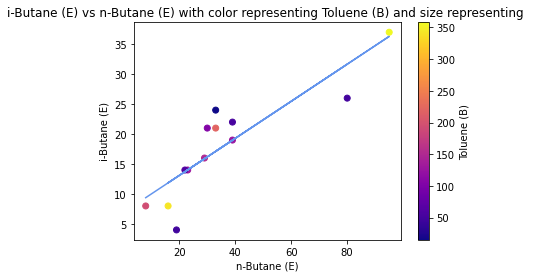

In [70]:
scatter1('n-Butane (E)', 'i-Butane (E)', c='Toluene (B)', bestfit = 'yes')

In [71]:
### try without intercept

slope, int = [ 1.41876027 11.32730688]
(R (correleation coefficient), p-value) = (0.8137889933787816, 0.0041735359560759085)


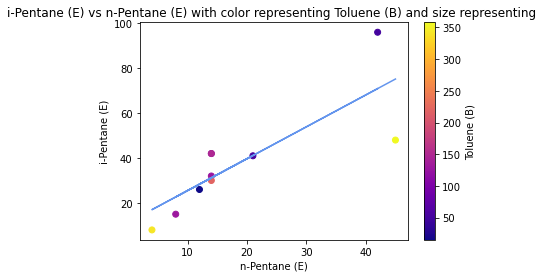

In [72]:
scatter1('n-Pentane (E)', 'i-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.30953027 6.90453047]
(R (correleation coefficient), p-value) = (0.872630780559741, 9.929364791445993e-05)


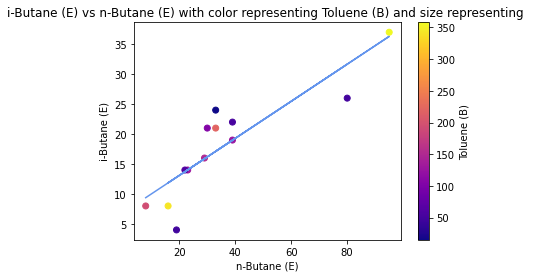

In [73]:
scatter1('n-Butane (E)', 'i-Butane (E)', c='Toluene (B)', bestfit = 'yes')

## Gradient trends

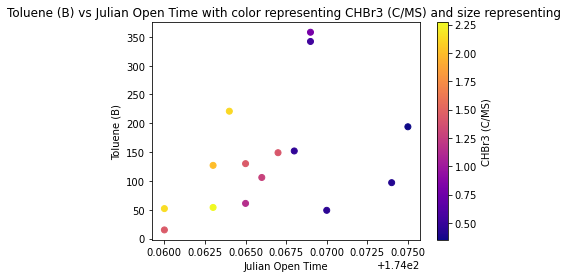

In [74]:
scatter1('Julian Open Time', 'Toluene (B)', c='CHBr3 (C/MS)')
#Same trend as DMS, Propane??, but no peak at main toluene point like Propane
#Bromoform...

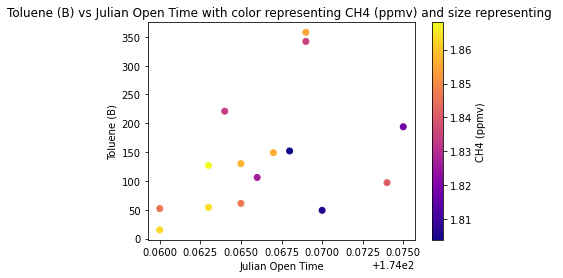

In [75]:
scatter1('Julian Open Time', 'Toluene (B)', c='CH4 (ppmv)')
#similar to propane a little bit

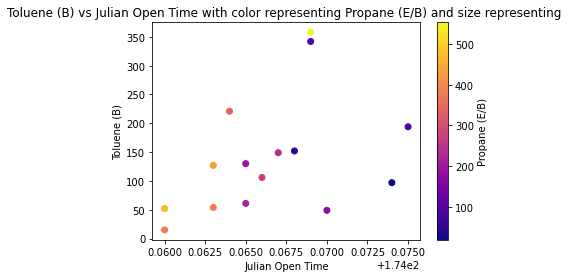

In [76]:
scatter1('Julian Open Time', 'Toluene (B)', c='Propane (E/B)')
# gradient here

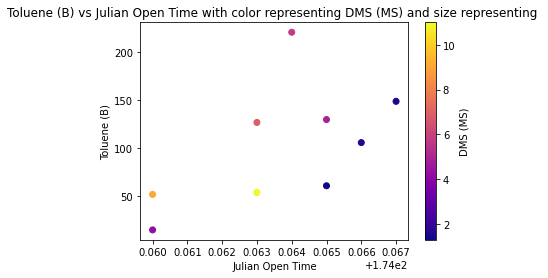

In [77]:
scatter1('Julian Open Time', 'Toluene (B)', c='DMS (MS)')
# SOME POINTS NOT PRESENT -- no DMS measurement
#DMS decreases on the descent into plume?, but also no points over the Salton Sea?
#See propane and CHBr3

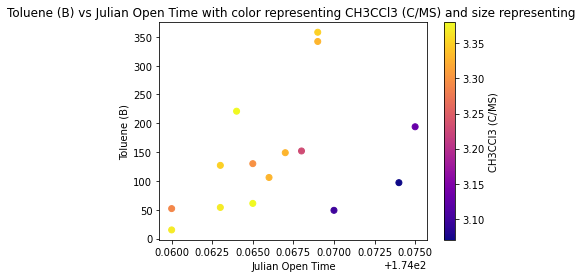

In [78]:
scatter1('Julian Open Time', 'Toluene (B)', c='CH3CCl3 (C/MS)')

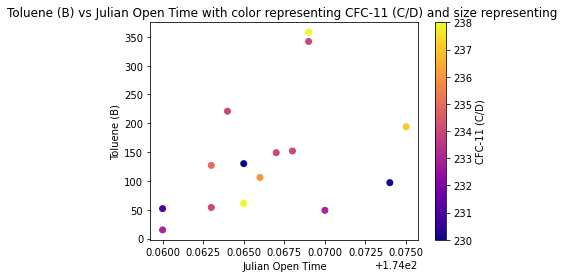

In [79]:
#these values are consistent with averages
scatter1('Julian Open Time', 'Toluene (B)', c='CFC-11 (C/D)')

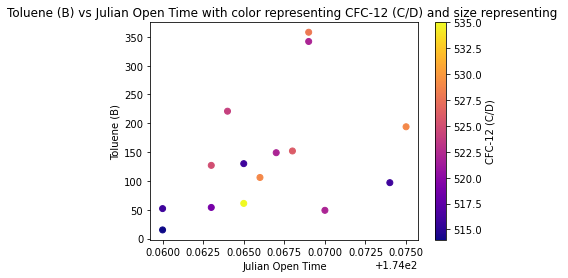

In [80]:
#these values are consistent with averages
scatter1('Julian Open Time', 'Toluene (B)', c='CFC-12 (C/D)')

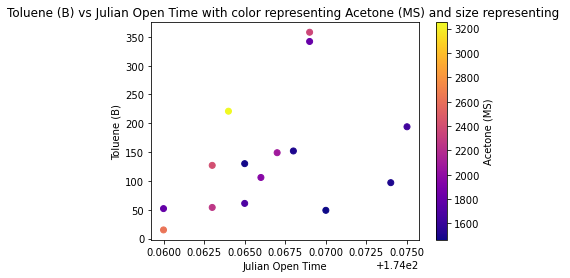

In [81]:
scatter1('Julian Open Time', 'Toluene (B)', c='Acetone (MS)')

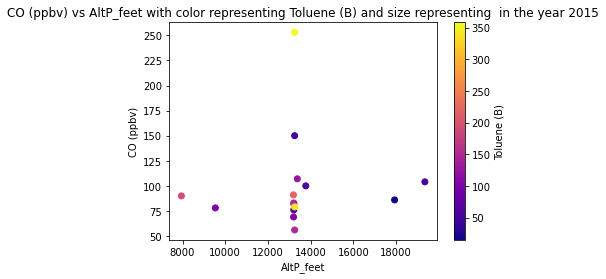

In [82]:
scatter1('AltP_feet', 'CO (ppbv)', c='Toluene (B)', year=2015)

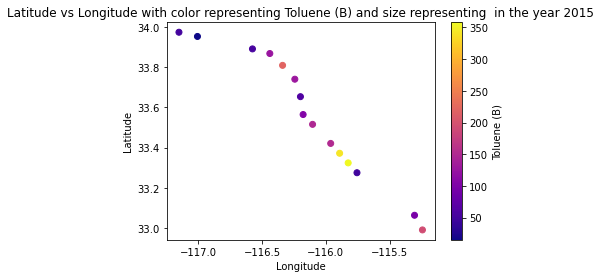

In [83]:
scatter1('Longitude', 'Latitude', c='Toluene (B)', year=2015, flight = '1')

(32.5, 34.5)

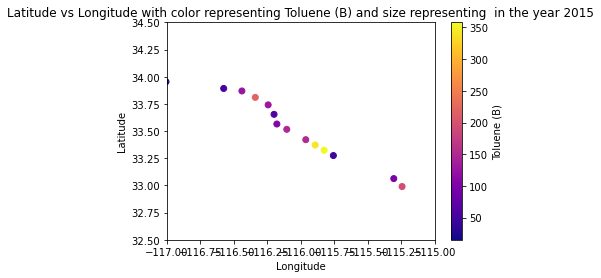

In [84]:
scatter1('Longitude', 'Latitude', c='Toluene (B)', year=2015)#, flight = '5')
plt.xlim(-117, -115)
plt.ylim(32.5, 34.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


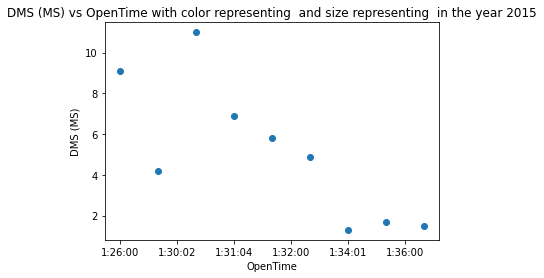

In [85]:
scatter1('OpenTime', 'DMS (MS)', year = 2015, flight='1')
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(7))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


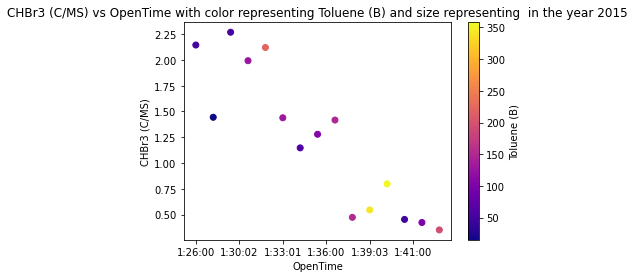

In [86]:
scatter1('OpenTime', 'CHBr3 (C/MS)', c='Toluene (B)', year = 2015, flight='1')
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(7))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


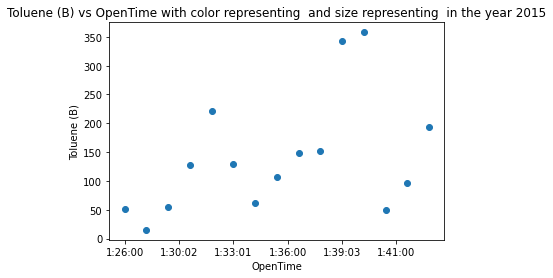

In [87]:
scatter1('OpenTime', 'Toluene (B)', year = 2015, flight='1')
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(7))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


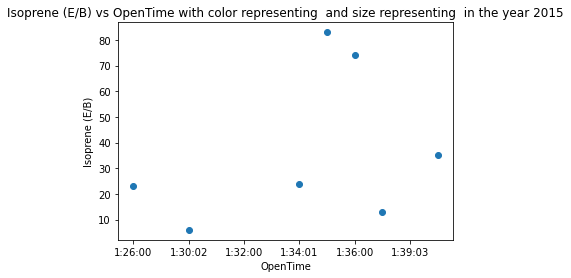

In [88]:
scatter1('OpenTime', 'Isoprene (E/B)', year = 2015, flight='1')
plt.axes().xaxis.set_major_locator(plt.MaxNLocator(7))

In [464]:
full = data()

In [465]:
flight_1_2015 = by_flight(by_year(full, 2015), '1')

In [466]:
flight_4_2011 = by_alt(by_flight(by_year(full, 2011), '4'), 6500) 

In [504]:
keys1 = ['Toluene (B)', 'Benzene (E/MS)', 'm/p-Xylene (MS)', 'Isoprene (E/B)', 'AltP_feet']
keys2 = ['n-Butane (E)', '2-BuONO2 (D)', 'n-Pentane (E)', '3-PeONO2 (D)', 'AltP_feet']
keys3 = ['DMS (MS)', 'CHBr3 (C/MS)', 'CH3I (C/D)', 'AltP_feet']

In [468]:
len(full.keys())

131

In [522]:
allkeys = ['DMS (MS)',
 'CHBr3 (C/MS)',
  'Toluene (B)',         
  'Benzene (E/MS)',
 'i-Pentane (E)', 
  '3-PeONO2 (D)',
 'AltP_feet']

In [539]:
def comparison(data, keys, title, vline=0, save=''):
    '''
    This function will create a subplot for all variables vs. Julian Open Time
    of each sample.
    
    args:
    data = flight dataset
    keys = variables/columns of 
    title = the title of your graph
    
    kwargs:
    vline = a Julian Open Time location where you want to plot a vertical line 
    on every subplot
    save = filename if you would like to save total image 
    '''
    #for some reason CH3I column is initially type string
    data['CH3I (C/D)'] = (data['CH3I (C/D)']).astype(float)
    
    fig, axs = plt.subplots((len(keys)), 1, figsize=(12, 240), sharex = 'col')
    plt.suptitle(title, fontsize = 'xx-large')
    for i,k in enumerate(keys):
        if k=='Comments':
            pass
        else:
            axis = axs[i]
            axis.scatter(data['Julian Open Time'], data[k])
            if vline != 0:
                axis.axvline(x=vline, color = 'salmon')
            axis.set(title=k, ylabel = k)
    axis.set(xlabel = 'Julian Open Time')
    axis.xaxis.set_major_locator(plt.MaxNLocator(20))
    if save != '':
        fig.savefig(save)
    fig.subplots_adjust(top=0.88, wspace=None, hspace=None)


In [471]:
def comparison2015(data, keys, title):
    fig, axs = plt.subplots((len(keys)), 1, figsize=(12, 220), sharex = 'col')
    fig.suptitle(title, size = 20)
    for i,k in enumerate(keys):
        axis = axs[i]
        axis.scatter(data['Julian Open Time'], data[k])
        axis.axvline(x=174.062, color = 'salmon')
        axis.set(title=k, ylabel = k)
        #axis.title.set_position([1.08, 0.45])
    axis.set(xlabel = 'Julian Open Time')
    axis.xaxis.set_major_locator(plt.MaxNLocator(20))
    #axis.set_xlim(181.754, 181.8)
    #fig.savefig('comparison2015_all.png')
    fig.subplots_adjust(wspace=None, hspace=None)
    
    #commented lines are for 2015

In [497]:
def comparison2011(data, keys, title):
    fig, axs = plt.subplots((len(keys)), 1, figsize=(12, 24), sharex = 'col')
    fig.suptitle(title, size = 20)
    for i,k in enumerate(keys):
        if k=='Comments':
            pass
        else:
            axis = axs[i]
            axis.scatter(data['Julian Open Time'], data[k])
            axis.axvline(x=181.776, color = 'green')
            axis.set(title=k, ylabel = k)
            #axis.title.set_position([1.08, 0.45])
    axis.set(xlabel = 'Julian Open Time')
    axis.xaxis.set_major_locator(plt.MaxNLocator(18))
    axis.set_xlim(181.754, 181.8)
    #fig.savefig('comparison2011_all.png')
    fig.subplots_adjust(wspace=None, hspace=None)

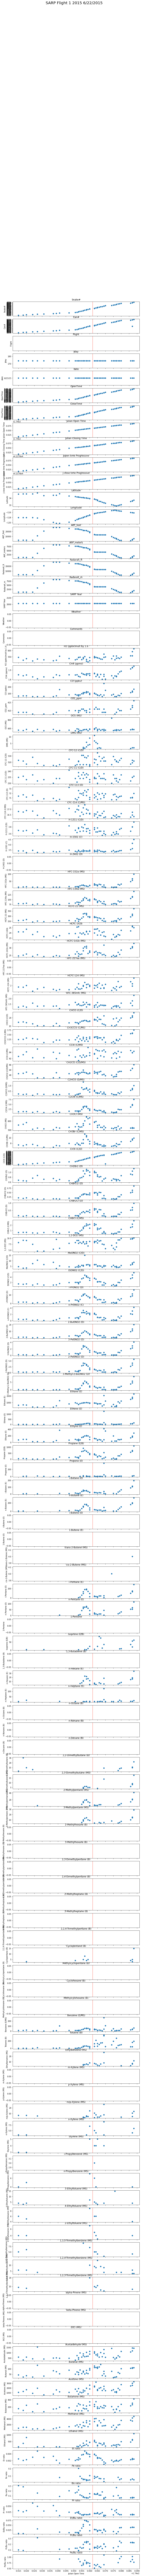

In [473]:
comparison2015(flight_1_2015, full.keys(), 'SARP Flight 1 2015 6/22/2015')

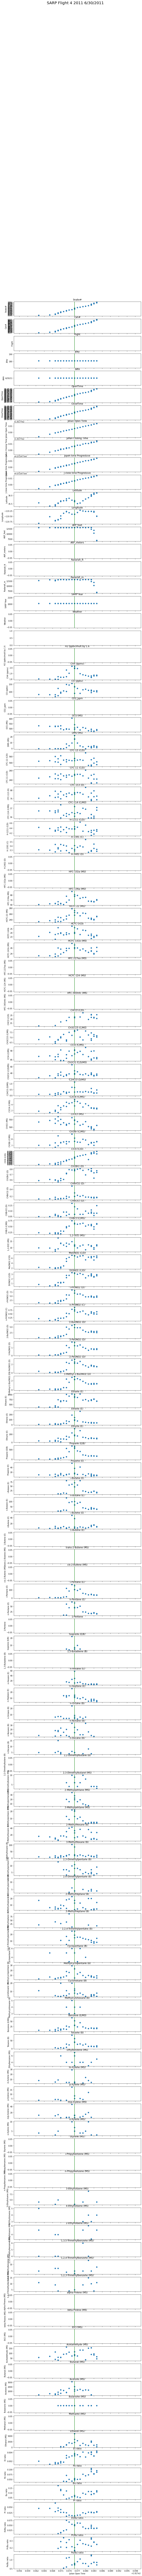

In [474]:
comparison2011(flight_4_2011, full.keys(), 'SARP Flight 4 2011 6/30/2011')

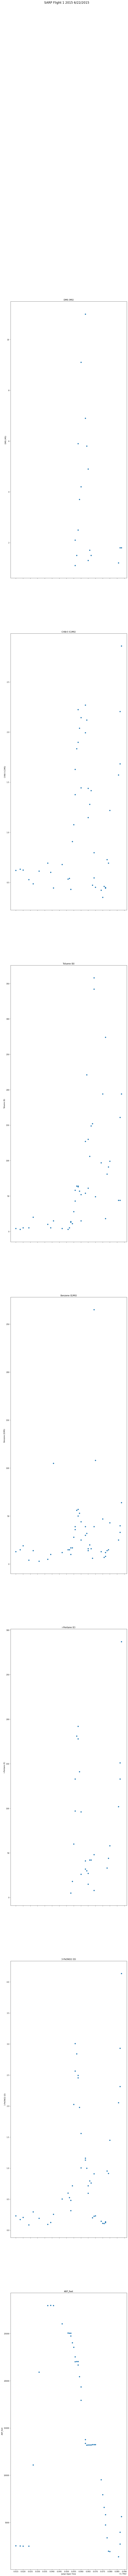

In [538]:
comparison(flight_1_2015, allkeys, 'SARP Flight 1 2015 6/22/2015')

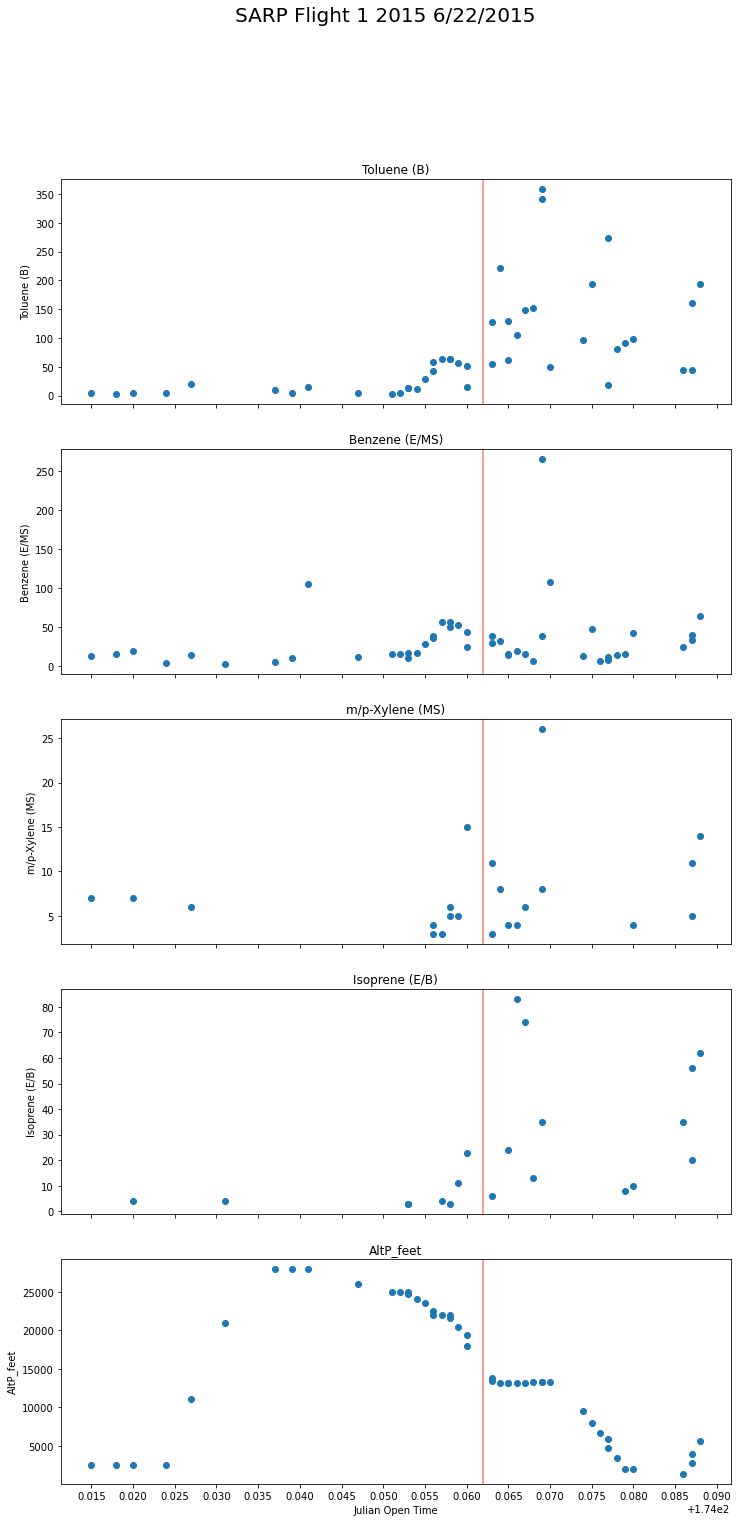

In [516]:
comparison(flight_1_2015, keys1, 'SARP Flight 1 2015 6/22/2015')
plt.savefig('plume3_2015.png')

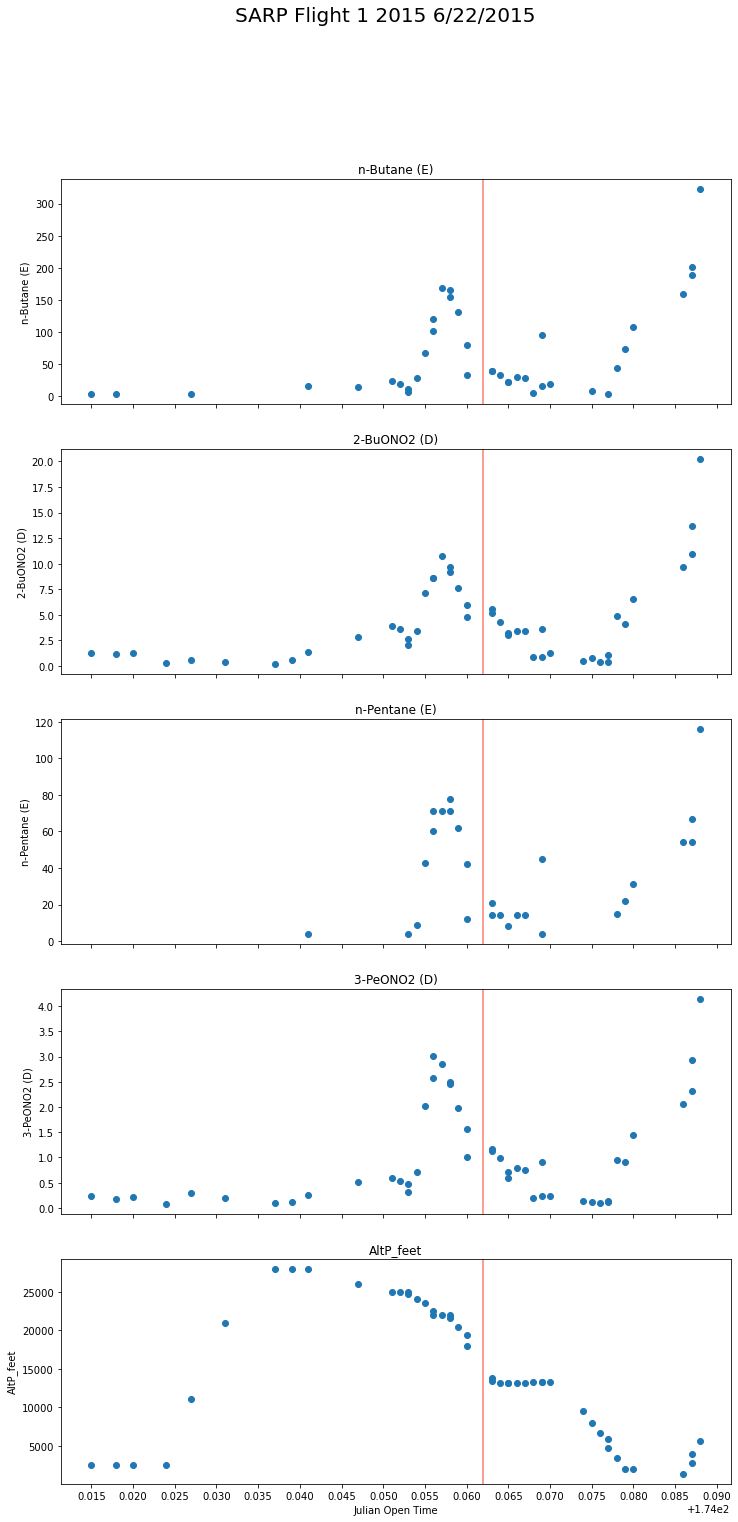

In [513]:
comparison(flight_1_2015, keys2, 'SARP Flight 1 2015 6/22/2015')
plt.savefig('plume1_2015.png')

In [510]:
flight_1_2015['CH3I (C/D)'] = (flight_1_2015['CH3I (C/D)']).astype(float)

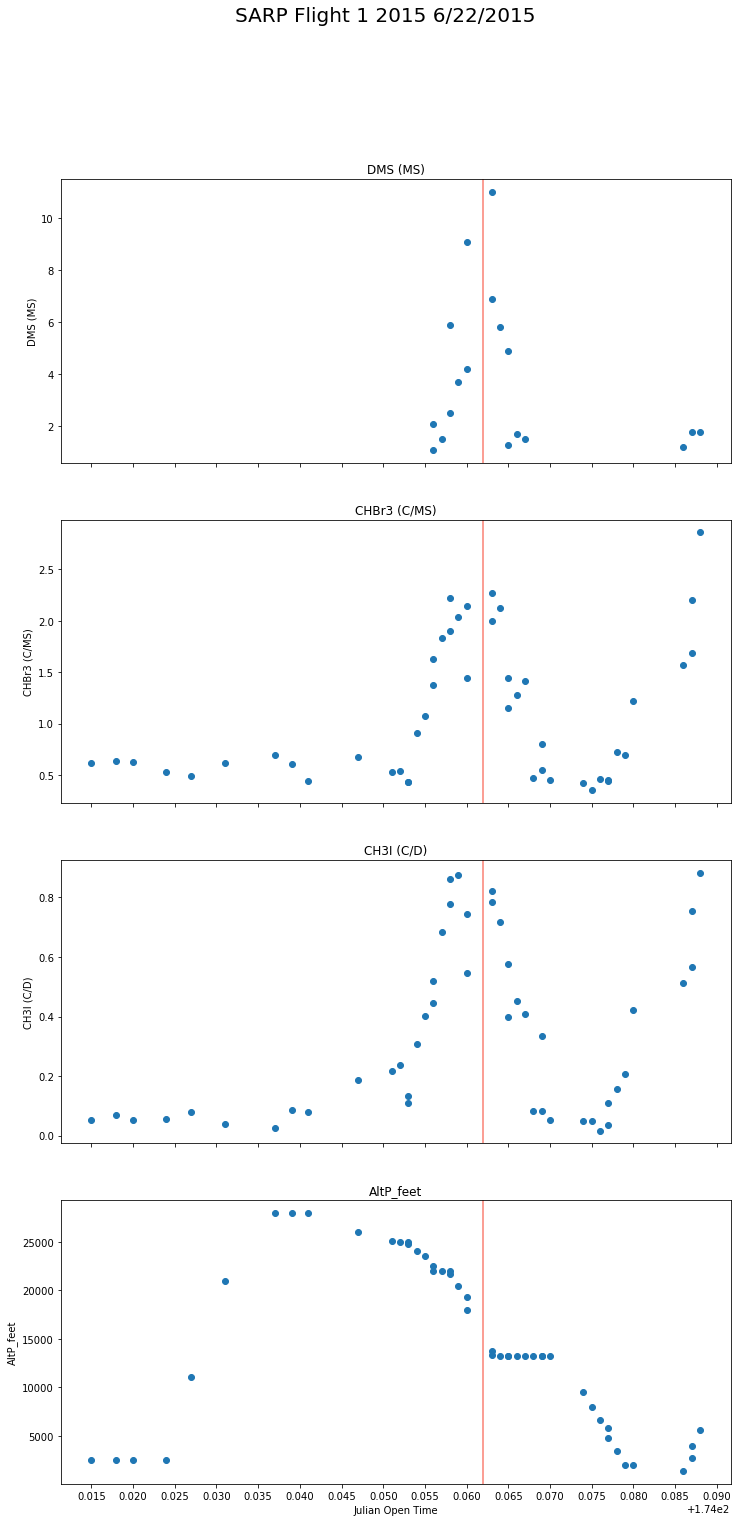

In [515]:
comparison(flight_1_2015, keys3, 'SARP Flight 1 2015 6/22/2015')
plt.savefig('plume2_2015.png')

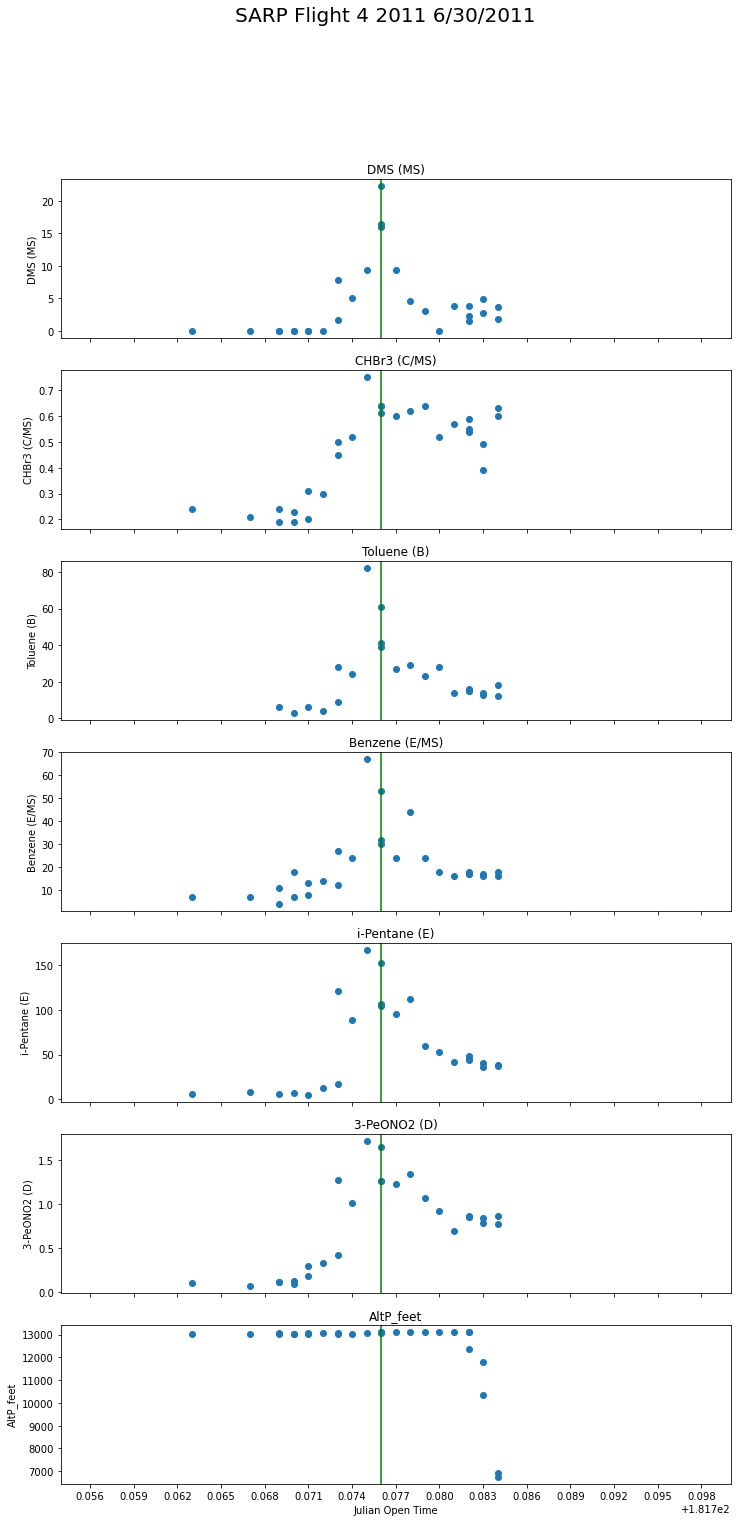

In [523]:
comparison2011(flight_4_2011, allkeys, 'SARP Flight 4 2011 6/30/2011')
plt.savefig('plumeonly_2011x.png')

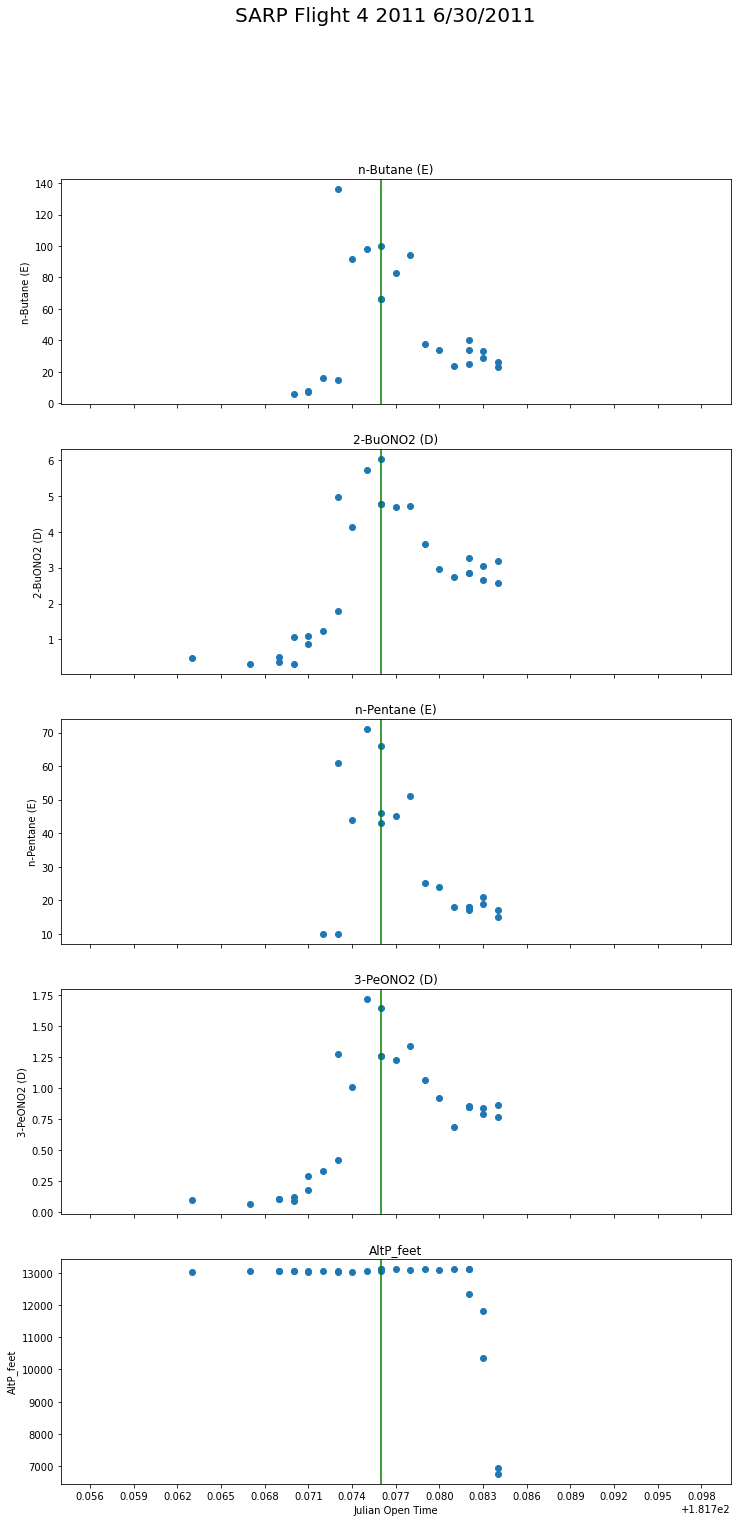

In [502]:
comparison2011(flight_4_2011, keys2, 'SARP Flight 4 2011 6/30/2011')

In [ ]:
#comparison(flight_4_2011, keys3, 'SARP Flight 4 2011 6/30/2011')

In [ ]:
#comparison(flight_4_2011, allkeys, 'SARP Flight 4 2011 6/30/2011')

In [101]:
plume2011 = pd.read_csv("Plume2011.csv", usecols = range(124))

In [102]:
plume2015 = pd.read_csv("Plume2015.csv", usecols = range(124))

In [103]:
full = plume2011

slope, int = [2.21284296 0.99854796]
(R (correleation coefficient), p-value) = (0.9853824200392438, 3.679188634453947e-12)


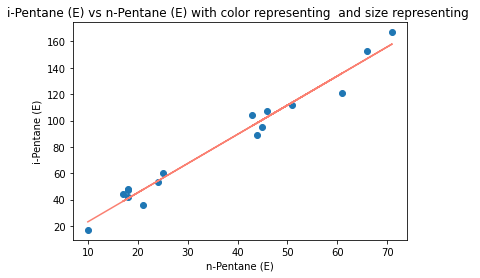

In [104]:
#2011 Pentane
scatter1('n-Pentane (E)','i-Pentane (E)', bestfit = 'yes')

slope, int = [ 0.70418505 -2.60581141]
(R (correleation coefficient), p-value) = (0.9657795126918877, 1.346038500224775e-09)


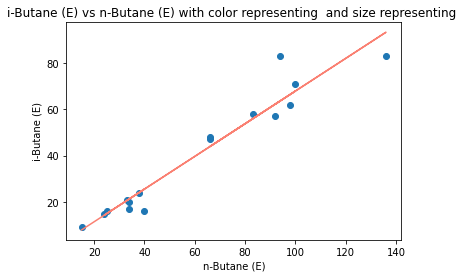

In [105]:
#2011 Butane
scatter1('n-Butane (E)','i-Butane (E)', bestfit = 'yes')

In [111]:
full = data()

In [112]:
two_plumes_2015 = by_alt(by_latlong(by_flight(by_year(full, 2015), '1'), 33.25, 34.7, -121, -115.6), 7000)

In [113]:
two_plumes_2015

Snake#  Can# Flight  Jday     date OpenTime CloseTime  Julian Open Time  \
2587   4118  9365      1   174  6/23/15  0:45:03   0:45:30           174.031   
2588   4103  9355      1   174  6/23/15  0:53:02   0:53:25           174.037   
2589   4114  9341      1   174  6/23/15  0:56:03   0:56:21           174.039   
2590   4119  9353      1   174  6/23/15  0:59:03   0:59:18           174.041   
2591   4104  9338      1   174  6/23/15  1:08:03   1:08:57           174.047   
2592   4113  9342      1   174  6/23/15  1:13:02   1:13:30           174.051   
2593   4120  9357      1   174  6/23/15  1:15:02   1:15:30           174.052   
2594   4105  9340      1   174  6/23/15  1:16:01   1:16:29           174.053   
2595   4112  9339      1   174  6/23/15  1:17:01   1:17:25           174.053   
2596   4121  9358      1   174  6/23/15  1:18:01   1:18:25           174.054   
2597   4106  9348      1   174  6/23/15  1:19:03   1:19:28           174.055   
2598   4111  9336      1   174  6/23/15  1:20:00   1:20:20           174.056   
2599   4122  9347      1   174  6/23/15  1:21:00   1:21:27           174.056   
2600   4107  9349      1   174  6/23/15  1:22:00   1:22:25           174.057   
2601   4110  9343      1   174  6/23/15  1:23:00   1:23:24           174.058   
2602   4123  9344      1   174  6/23/15  1:24:00   1:24:26           174.058   
2603   4108  9345      1   174  6/23/15  1:25:00   1:25:24           174.059   
2604   4109  9415      1   174  6/23/15  1:26:00   1:26:25           174.060   
2605   4124  9352      1   174  6/23/15  1:27:00   1:27:25           174.060   
2606   4001  9362      1   174  6/23/15  1:30:02   1:30:31           174.063   
2607   4016  9364      1   174  6/23/15  1:31:04   1:31:32           174.063   
2608   4017  9360      1   174  6/23/15  1:32:00   1:32:32           174.064   
2609   4002  9378      1   174  6/23/15  1:33:01   1:33:34           174.065   
2610   4015  9382      1   174  6/23/15  1:34:01   1:34:30           174.065   
2611   4018  9369      1   174  6/23/15  1:35:00   1:35:32           174.066   
2612   4003  9368      1   174  6/23/15  1:36:00   1:36:34           174.067   
2613   4019  9375      1   174  6/23/15  1:38:00   1:38:36           174.068   
2614   4004  9380      1   174  6/23/15  1:39:03   1:39:36           174.069   
2615   4013  9374      1   174  6/23/15  1:40:00   1:40:37           174.069   
2616   4020  9383      1   174  6/23/15  1:41:00   1:41:38           174.070   

      Julian Closing Time  Jopen time Progressive  J close time Progressive  \
2587              174.032              42178.0313                42178.0316   
2588              174.037              42178.0368                42178.0371   
2589              174.039              42178.0389                42178.0391   
2590              174.041              42178.0410                42178.0412   
2591              174.048              42178.0473                42178.0479   
2592              174.051              42178.0507                42178.0510   
2593              174.052              42178.0521                42178.0524   
2594              174.053              42178.0528                42178.0531   
2595              174.054              42178.0535                42178.0538   
2596              174.054              42178.0542                42178.0545   
2597              174.055              42178.0549                42178.0552   
2598              174.056              42178.0556                42178.0558   
2599              174.057              42178.0563                42178.0566   
2600              174.057              42178.0569                42178.0572   
2601              174.058              42178.0576                42178.0579   
2602              174.059              42178.0583                42178.0586   
2603              174.059              42178.0590                42178.0593   
2604              174.060              42178.0597                42178.0600   
2605              174.0

In [114]:
full = two_plumes_2015

slope, int = [ 2.17320718 -2.25247978]
(R (correleation coefficient), p-value) = (0.9347641959168353, 4.632893095196313e-09)


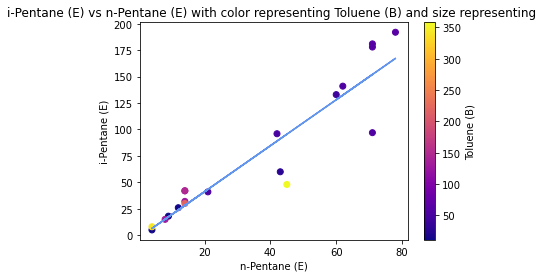

In [115]:
#2015 Pentane
scatter1('n-Pentane (E)','i-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.27881011 7.19732928]
(R (correleation coefficient), p-value) = (0.9219772055011771, 2.2455678494330364e-11)


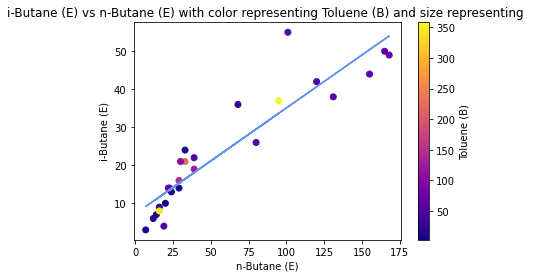

In [116]:
#2015 Butane
scatter1('n-Butane (E)','i-Butane (E)', c='Toluene (B)', bestfit = 'yes')

> # Alkanes vs Nitrates Ratios
>    ## as a proxy for age

In [380]:
full = data()

In [381]:
low =  by_alt(by_year(full, 2015), 0, 1000)

In [382]:
full = low

slope, int = [  998.52010498 -4975.32694504]
(R (correleation coefficient), p-value) = (0.9959714682088772, 2.4310912929152128e-05)


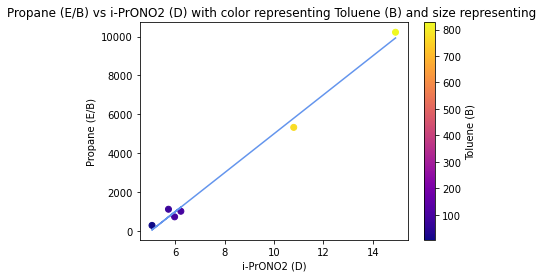

In [383]:
scatter1('i-PrONO2 (D)','Propane (E/B)', c='Toluene (B)', bestfit = 'yes')

slope, int = [  79.62645502 -148.98892685]
(R (correleation coefficient), p-value) = (0.6973545445178138, 6.135014823154759e-26)


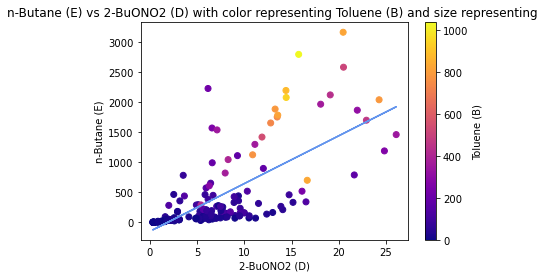

In [347]:
scatter1('2-BuONO2 (D)','n-Butane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [177.29832708 -38.37469822]
(R (correleation coefficient), p-value) = (0.726920950472606, 4.6613360352374227e-29)


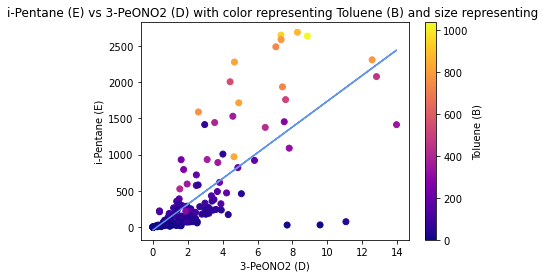

In [348]:
scatter1('3-PeONO2 (D)','i-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [28.66892344 48.32234344]
(R (correleation coefficient), p-value) = (0.5535375282074158, 7.149450993681686e-15)


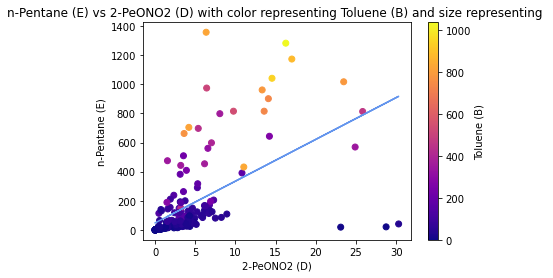

In [349]:
scatter1('2-PeONO2 (D)','n-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

In [350]:
full = data()

In [351]:
high_plume = by_alt(by_flight(by_year(full, 2015), '1'), 17000, 26000)

In [352]:
low_plume = by_alt(by_flight(by_year(full, 2015), '1'), 13000, 14000)

### 2015 at 20000-25000 ft

In [385]:
full = high_plume

slope, int = [  82.78448003 -104.07917264]
(R (correleation coefficient), p-value) = (0.9824851026546059, 7.199072156015633e-11)


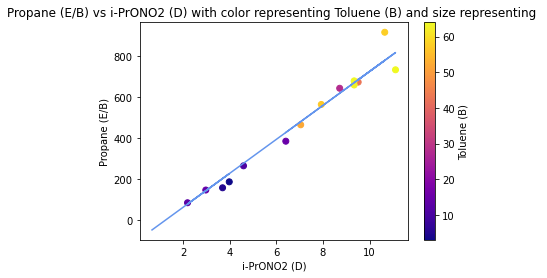

In [354]:
scatter1('i-PrONO2 (D)','Propane (E/B)', c='Toluene (B)', bestfit = 'yes')

slope, int = [ 20.09696769 -46.98744357]
(R (correleation coefficient), p-value) = (0.961954553229241, 4.033062563462507e-08)


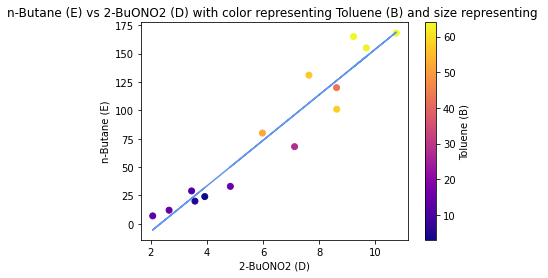

In [355]:
scatter1('2-BuONO2 (D)','n-Butane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.04604459 2.63331254]
(R (correleation coefficient), p-value) = (0.961954553229241, 4.033062563462507e-08)


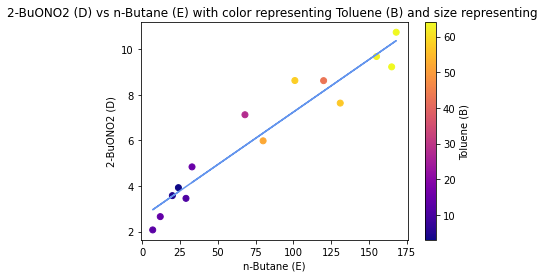

In [356]:
scatter1('n-Butane (E)','2-BuONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [22.21927854 -9.45911445]
(R (correleation coefficient), p-value) = (0.9405512927942157, 1.635580307397033e-05)


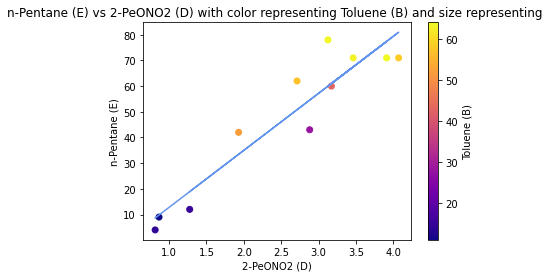

In [386]:
scatter1('2-PeONO2 (D)','n-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.03981393 0.67257422]
(R (correleation coefficient), p-value) = (0.9405512927942157, 1.635580307397033e-05)


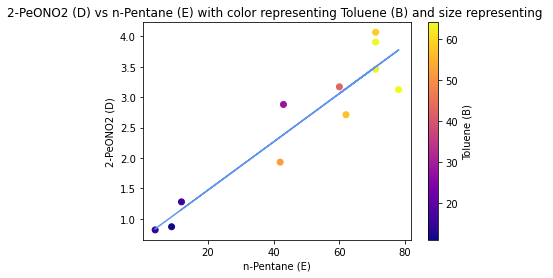

In [358]:
scatter1('n-Pentane (E)', '2-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.72169986 0.07890029]
(R (correleation coefficient), p-value) = (0.994301840701767, 5.008294369332719e-14)


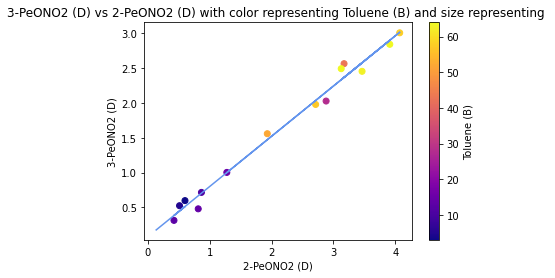

In [359]:
scatter1('2-PeONO2 (D)','3-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

### 2015 at 13000 ft

In [387]:
full = low_plume

slope, int = [46.77643827 64.33780872]
(R (correleation coefficient), p-value) = (0.7333604090544762, 0.010221067542185141)


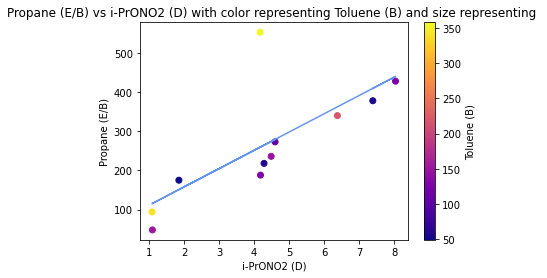

In [361]:
scatter1('i-PrONO2 (D)','Propane (E/B)', c='Toluene (B)', bestfit = 'yes')

slope, int = [7.11464993 9.22981514]
(R (correleation coefficient), p-value) = (0.4864304075557717, 0.1292169878370398)


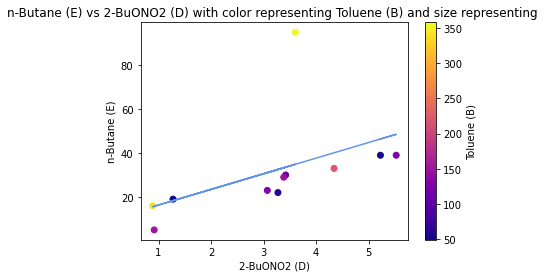

In [362]:
scatter1('2-BuONO2 (D)','n-Butane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.03325737 2.11672007]
(R (correleation coefficient), p-value) = (0.4864304075557717, 0.1292169878370398)


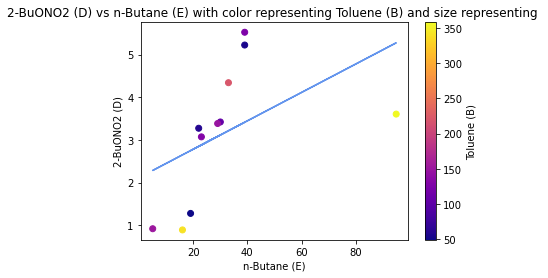

In [363]:
scatter1('n-Butane (E)','2-BuONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [16.80314857  0.18629634]
(R (correleation coefficient), p-value) = (0.5133397442895801, 0.19321294087792543)


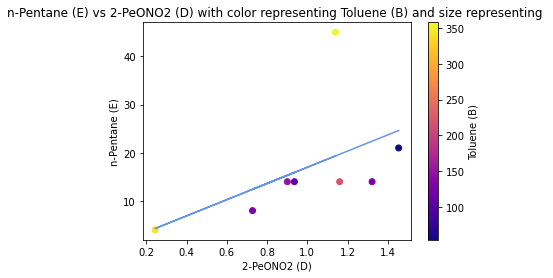

In [388]:
scatter1('2-PeONO2 (D)','n-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.01568263 0.72306587]
(R (correleation coefficient), p-value) = (0.5133397442895801, 0.19321294087792543)


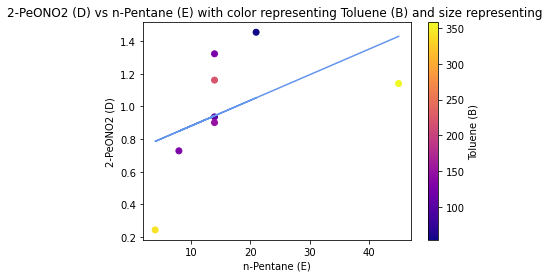

In [365]:
scatter1('n-Pentane (E)','2-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.79421307 0.04531148]
(R (correleation coefficient), p-value) = (0.9929830080068035, 1.1768600385034528e-09)


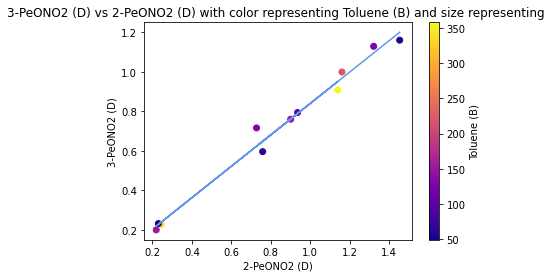

In [366]:
scatter1('2-PeONO2 (D)','3-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

In [316]:
full = data()

### 2011

In [304]:
high_plume11 = by_alt(by_flight(by_year(full, 2011), '4'), 12000, 50000)

In [330]:
full = high_plume11

slope, int = [  84.77420131 -105.02729045]
(R (correleation coefficient), p-value) = (0.9250042892604311, 1.0251680206241897e-10)


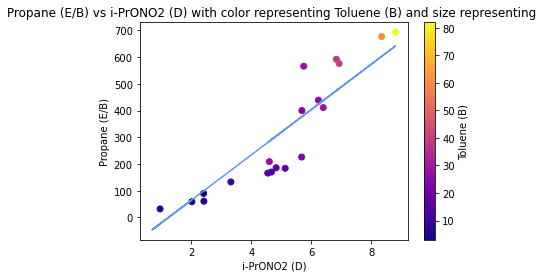

In [306]:
scatter1('i-PrONO2 (D)','Propane (E/B)', c='Toluene (B)', bestfit = 'yes')

slope, int = [ 21.53097925 -21.05650307]
(R (correleation coefficient), p-value) = (0.9010953325034496, 1.4167097244425865e-07)


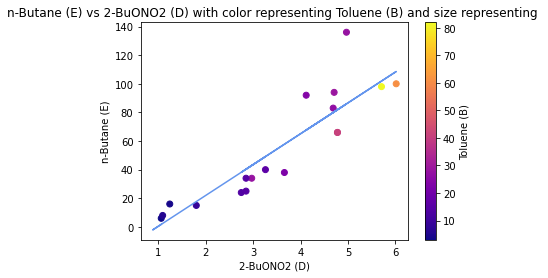

In [314]:
scatter1('2-BuONO2 (D)','n-Butane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.03771184 1.42931449]
(R (correleation coefficient), p-value) = (0.9010953325034496, 1.4167097244425865e-07)


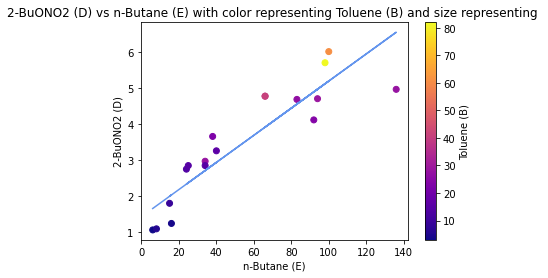

In [331]:
scatter1('n-Butane (E)', '2-BuONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [ 49.0238963  -15.85375151]
(R (correleation coefficient), p-value) = (0.9320649528389631, 1.4944122015490607e-07)


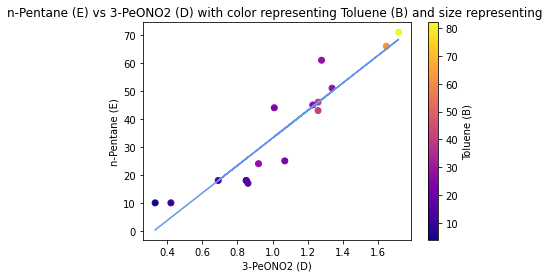

In [332]:
scatter1('3-PeONO2 (D)','n-Pentane (E)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.03317985 0.80168915]
(R (correleation coefficient), p-value) = (0.9070787302940759, 1.2507914525564607e-06)


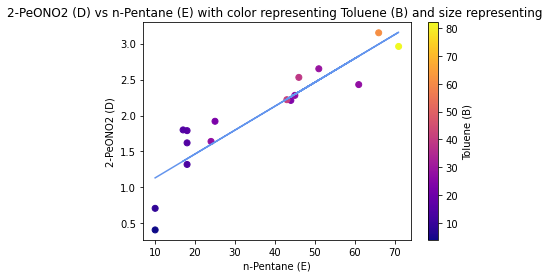

In [333]:
scatter1('n-Pentane (E)','2-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

slope, int = [0.51192787 0.03178341]
(R (correleation coefficient), p-value) = (0.9894105321135316, 6.16047425433409e-20)


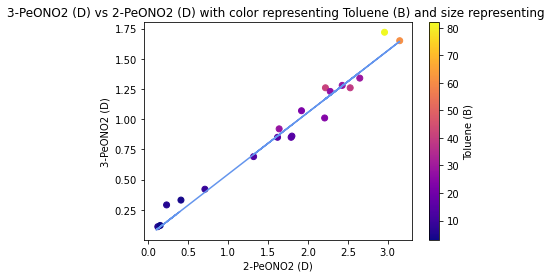

In [309]:
scatter1('2-PeONO2 (D)','3-PeONO2 (D)', c='Toluene (B)', bestfit = 'yes')

In [234]:
#how to find the alkanes vs nitrates for a YOUNG plume ???

In [477]:
full = data()

In [478]:
high = by_alt(full, 10000)

In [479]:
full = high

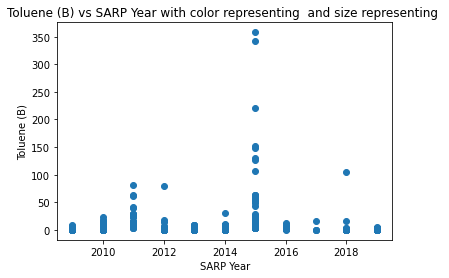

In [480]:
scatter1('SARP Year', 'Toluene (B)')